In [13]:
! ls -t -d logs_*/

logs_reweight_2Dx2D_clip2_1000_lr2_tanh_G_128to32x7_D_bn/
logs_reweight_2Dx2D_clip2_1000_lr2_tanh_G_128to32x7/
logs_reweight_2Dx2D_clip2_1000_lr2_tanh_G_128x7/
logs_reweight_2Dx2D_clip2_1000_lr2_tanh_only/
logs_reweight_2Dx2D_clip2_1000_lr2_tanh/
logs_reweight_2Dx2D_clip2_1000_lr2_tanh_only_D_bn/
logs_reweight_2Dx2D_clip2_1000_lr2/
logs_reweight_2Dx2D_clip2_500/
logs_reweight_2Dx2D_clip1_500_D_dropoout0p5/
logs_reweight_2Dx2D_clip1_500_fix_last_layer/
logs_reweight_2Dx2D_clip5_500_fix_last_layer/
logs_reweight_2Dx2D_clip1_500/
logs_reweight_2Dx2D_clip5_500/
logs_reweight_fix_clip5_500/
logs_reweight_G128x7_10000/
logs_reweight_10000/
logs_rewei_500/


In [30]:
target = 'logs_reweight_2Dx2D_clip2_1000_lr2_tanh'
df = pd.read_csv('%s/metrics.csv' % target)

In [31]:
df['emd_est'] = df['generator_loss']
print(df['epoch'].max())

# df['emd_est']

998


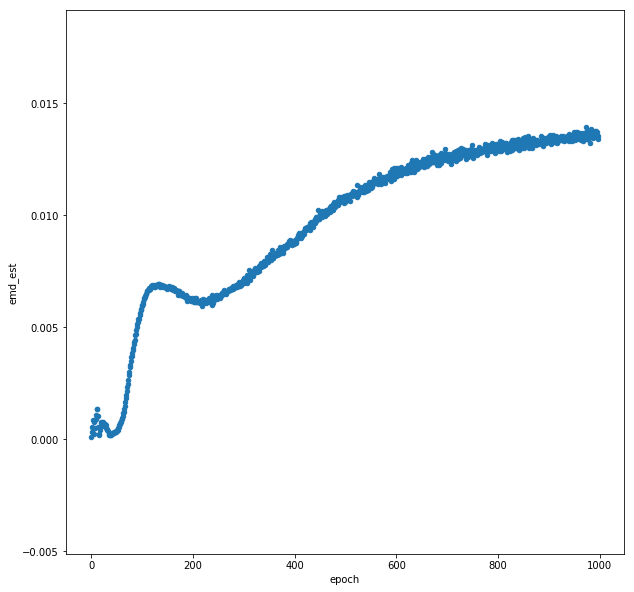

In [32]:
first = 0
last = -1
df.loc[first:].plot.scatter('epoch','emd_est')
maxval = df.loc[first:]['emd_est'].max()

# plt.ylim(-0.1*maxval,maxval*1.2)

In [33]:
from IPython.core.display import Image, display




logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_900_var1.png


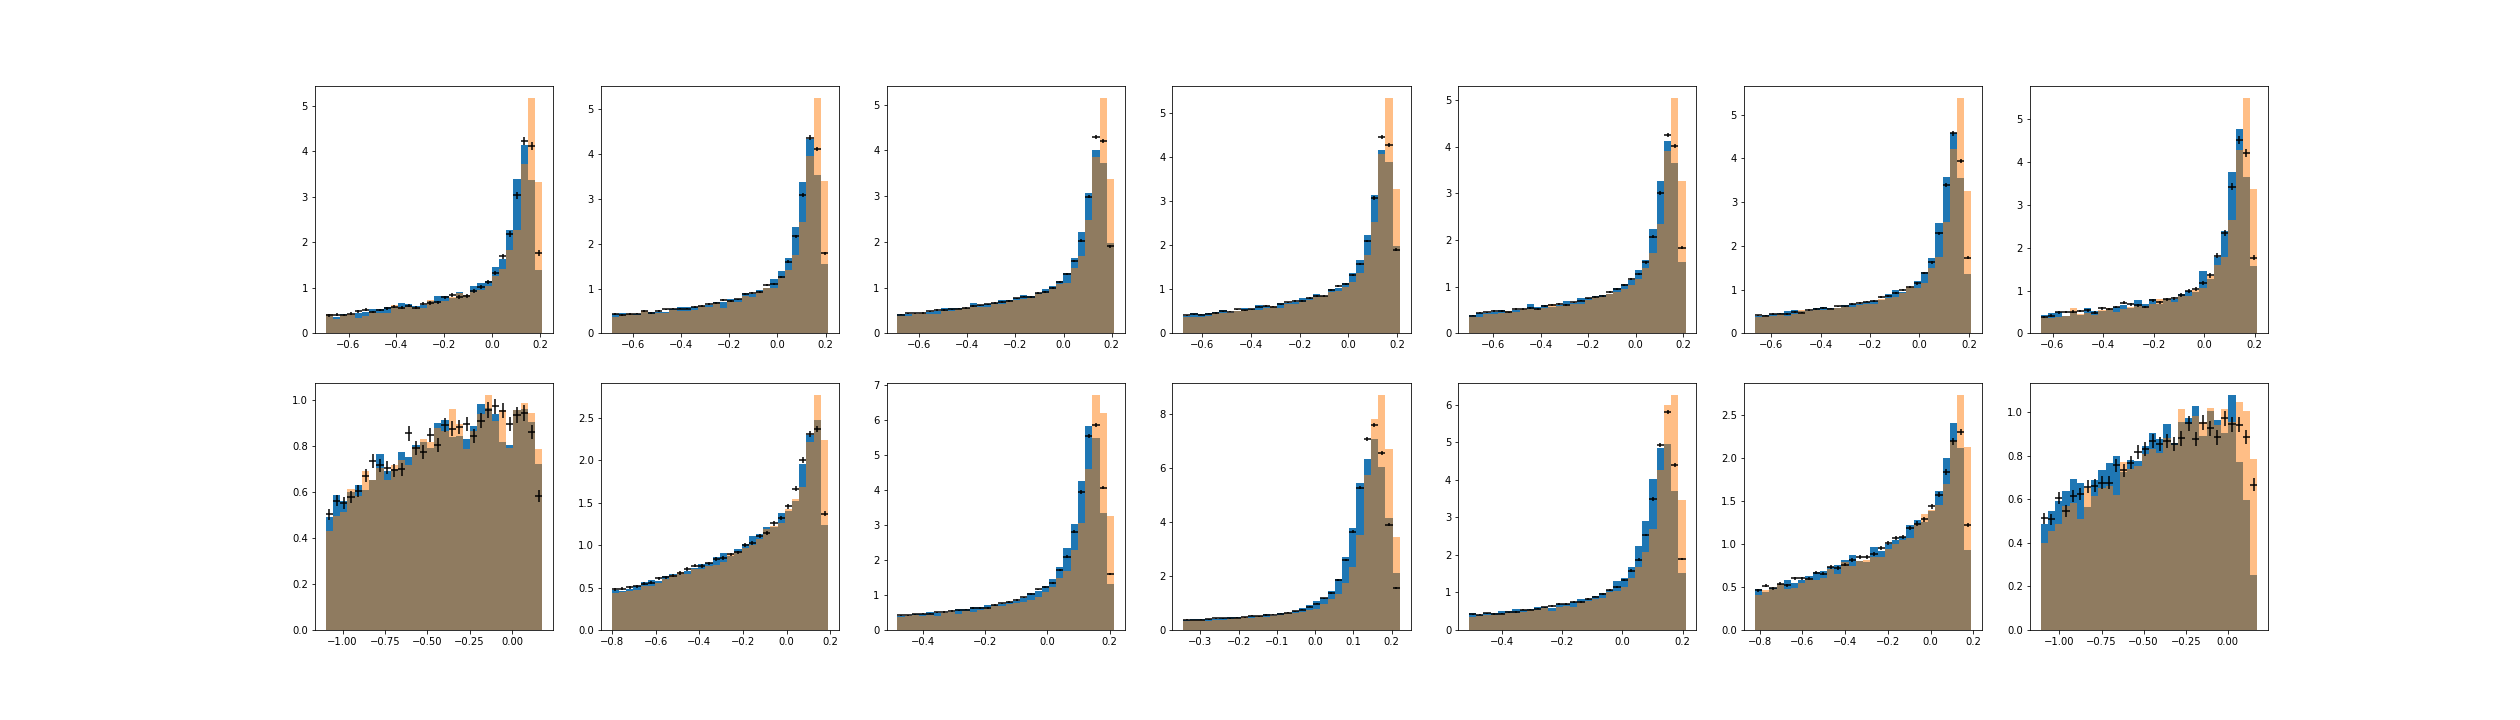

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_900_var0.png


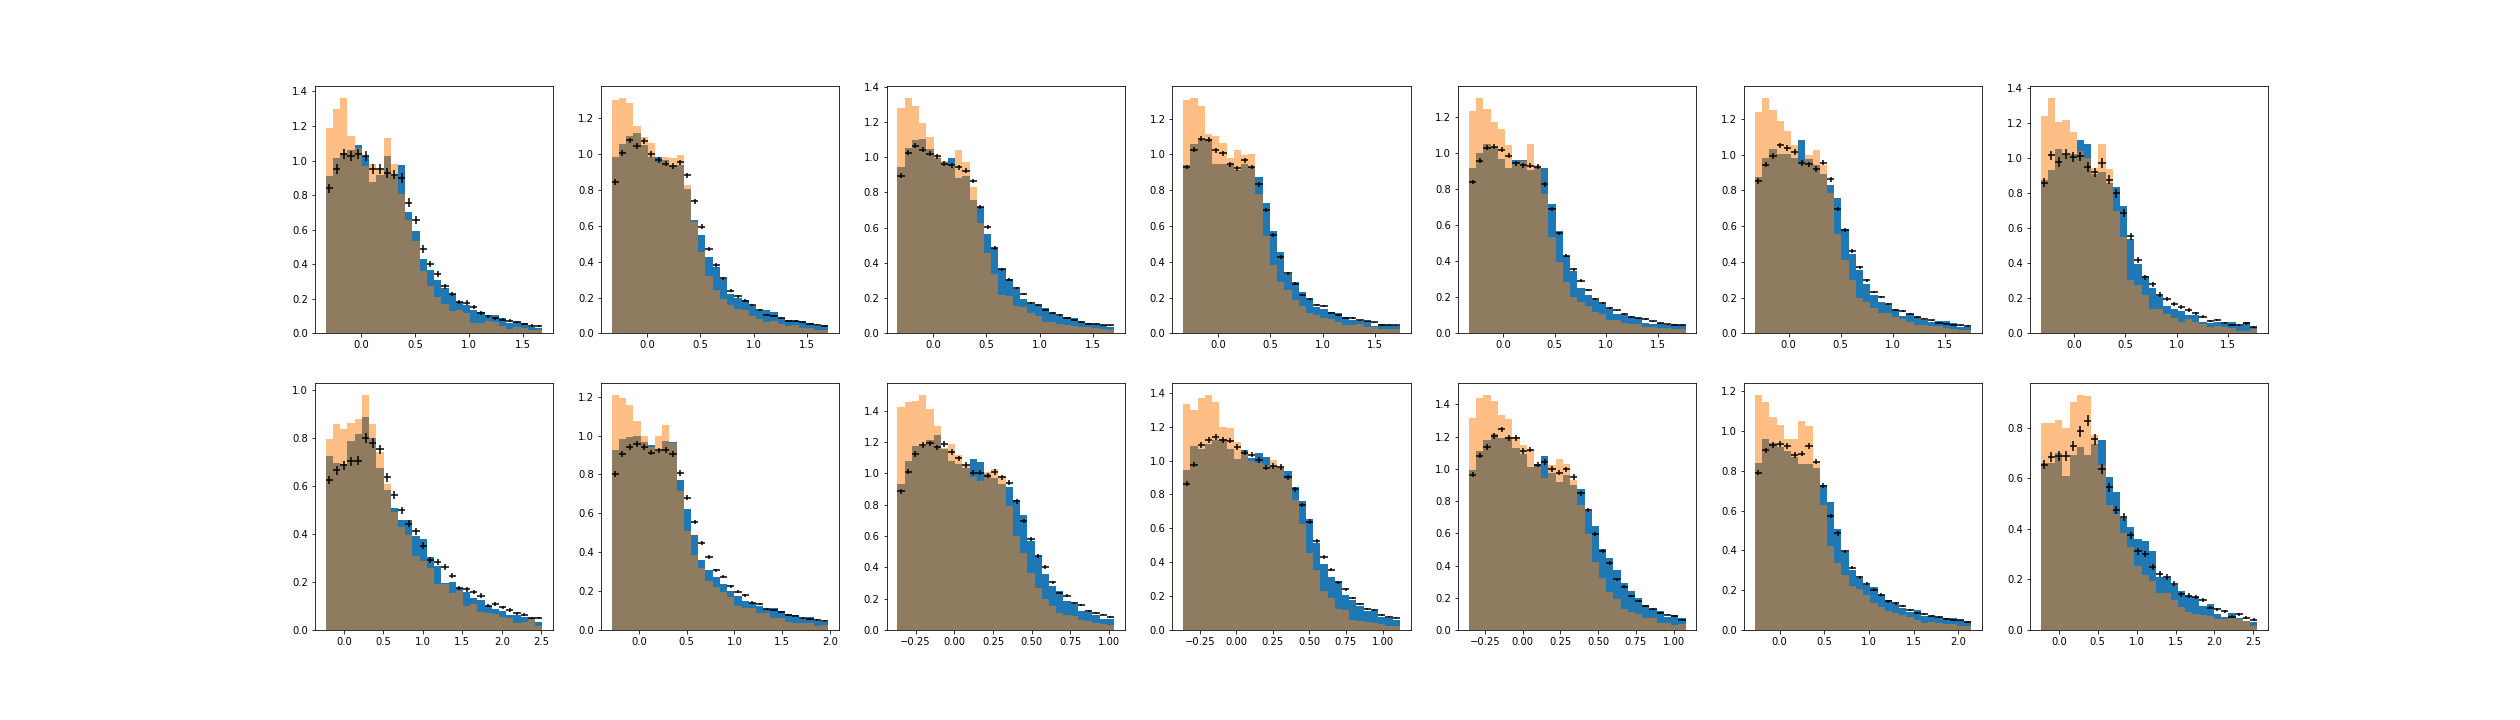

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_800_var1.png


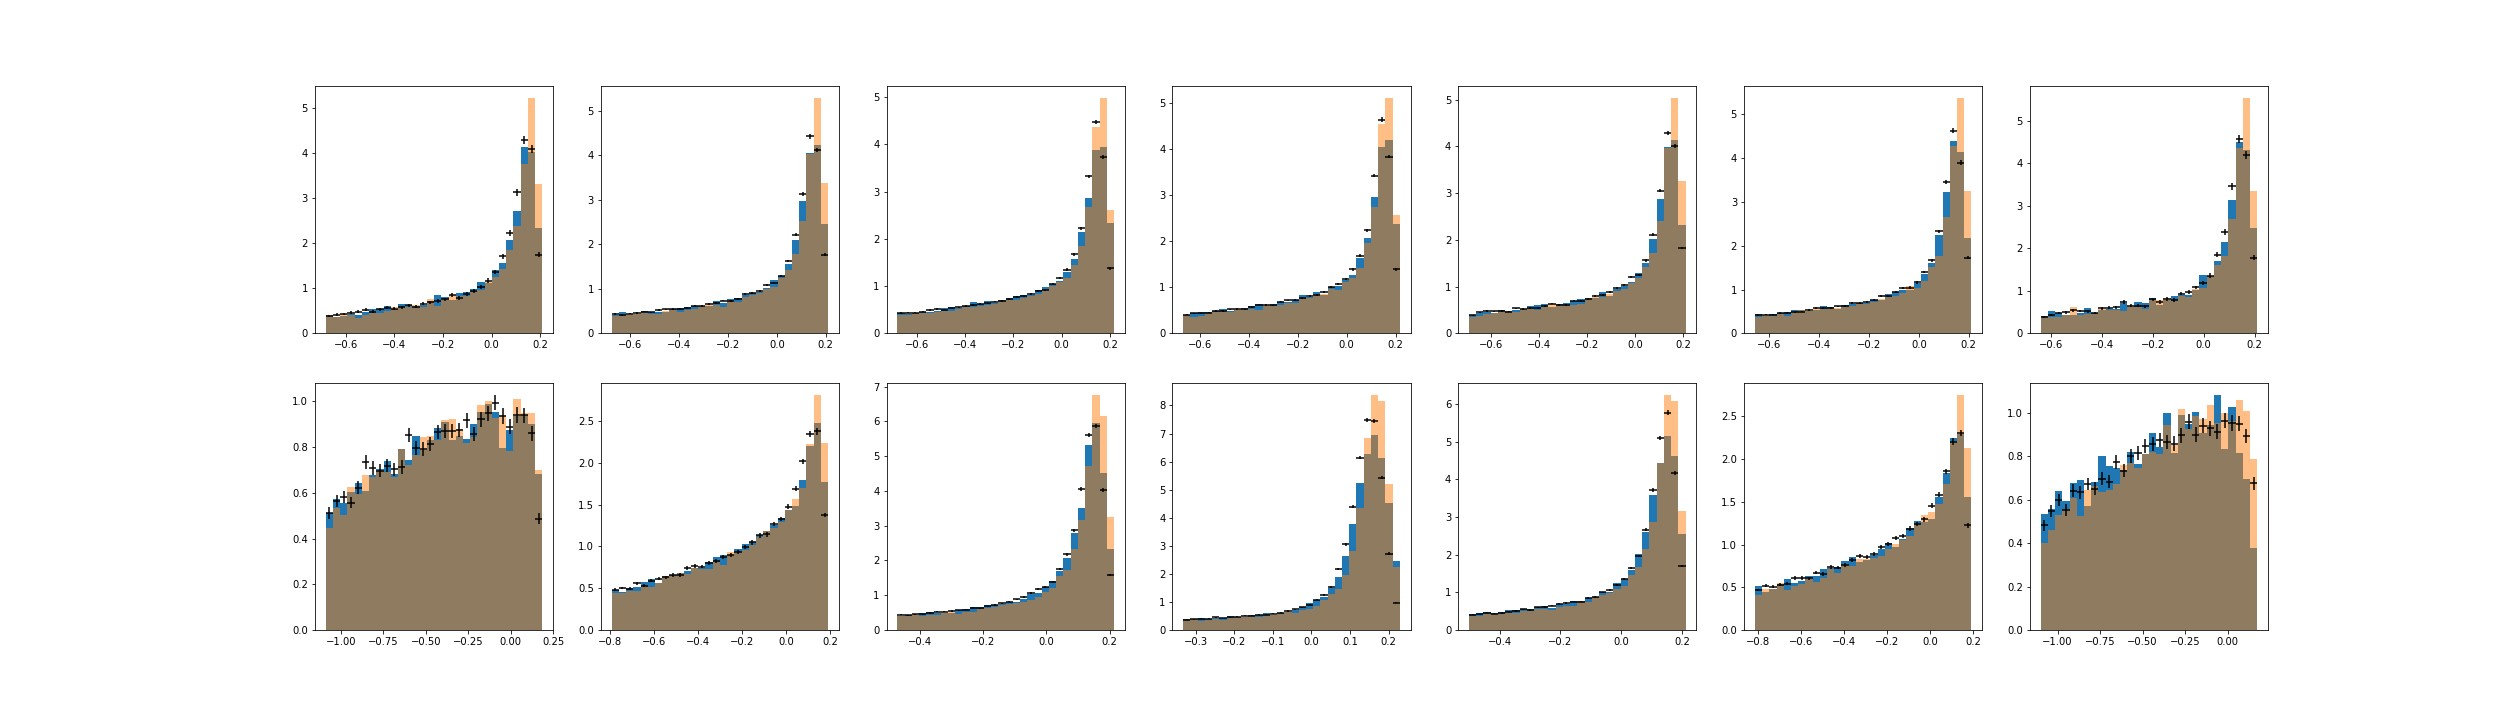

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_800_var0.png


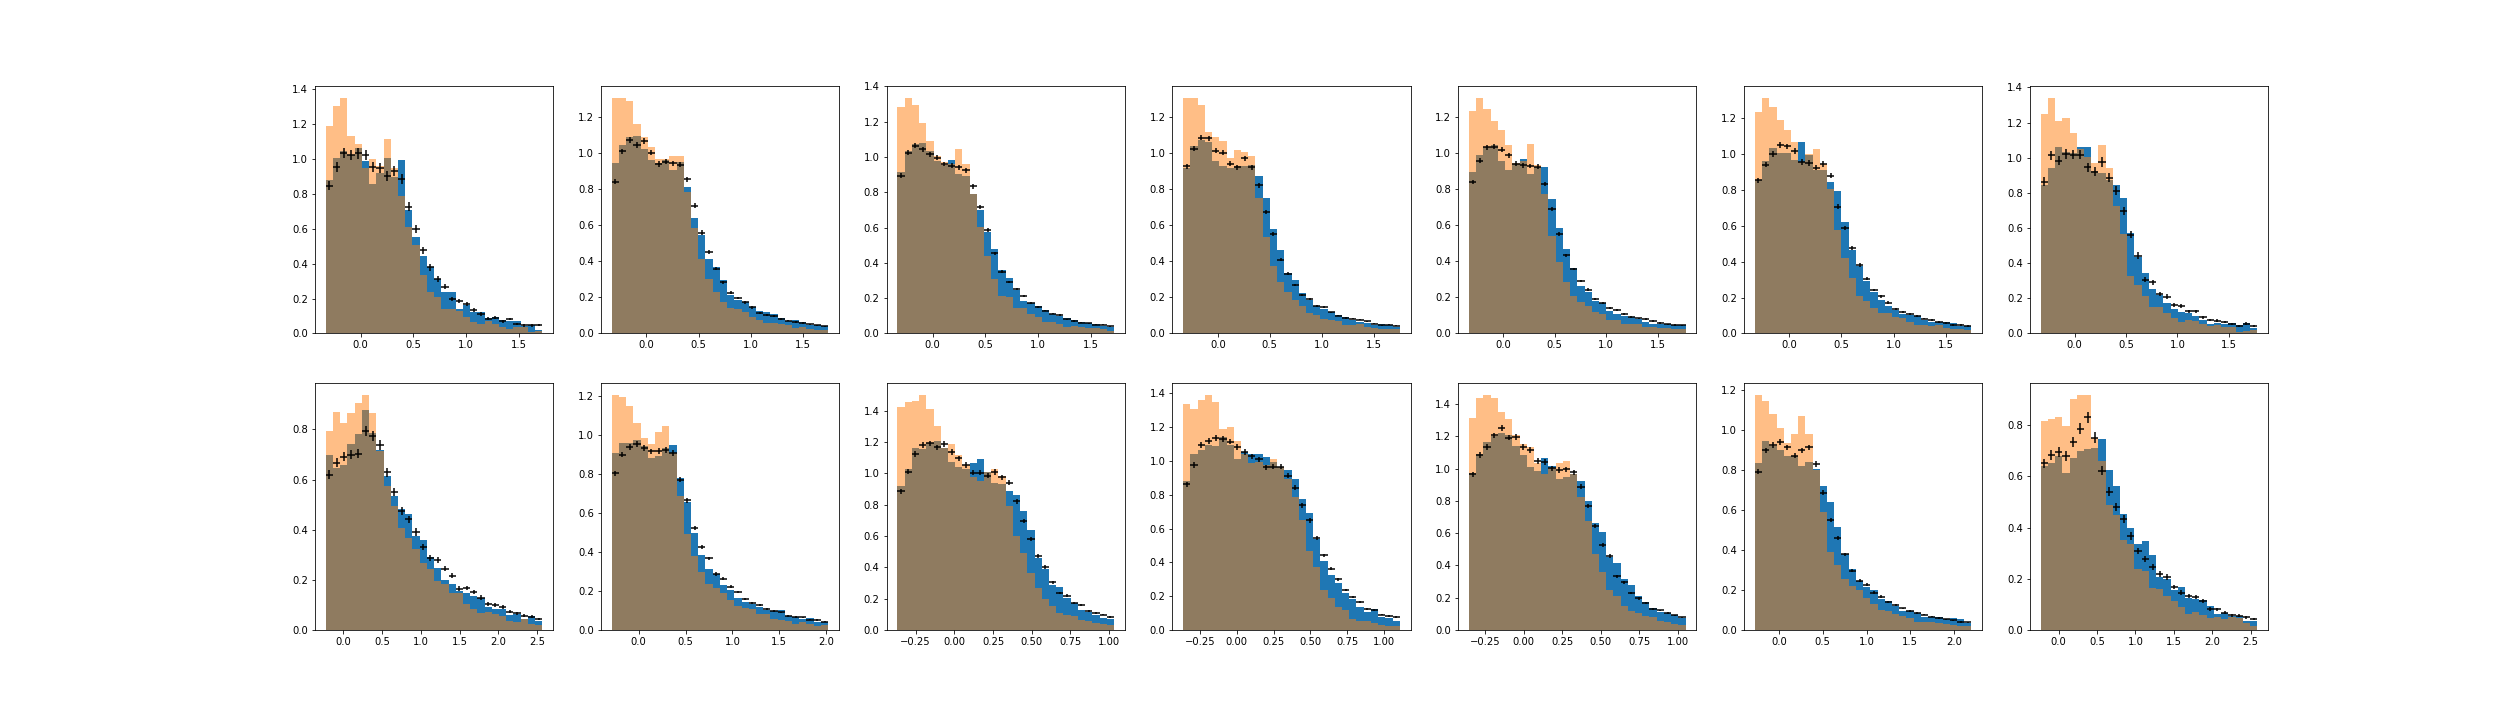

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_700_var1.png


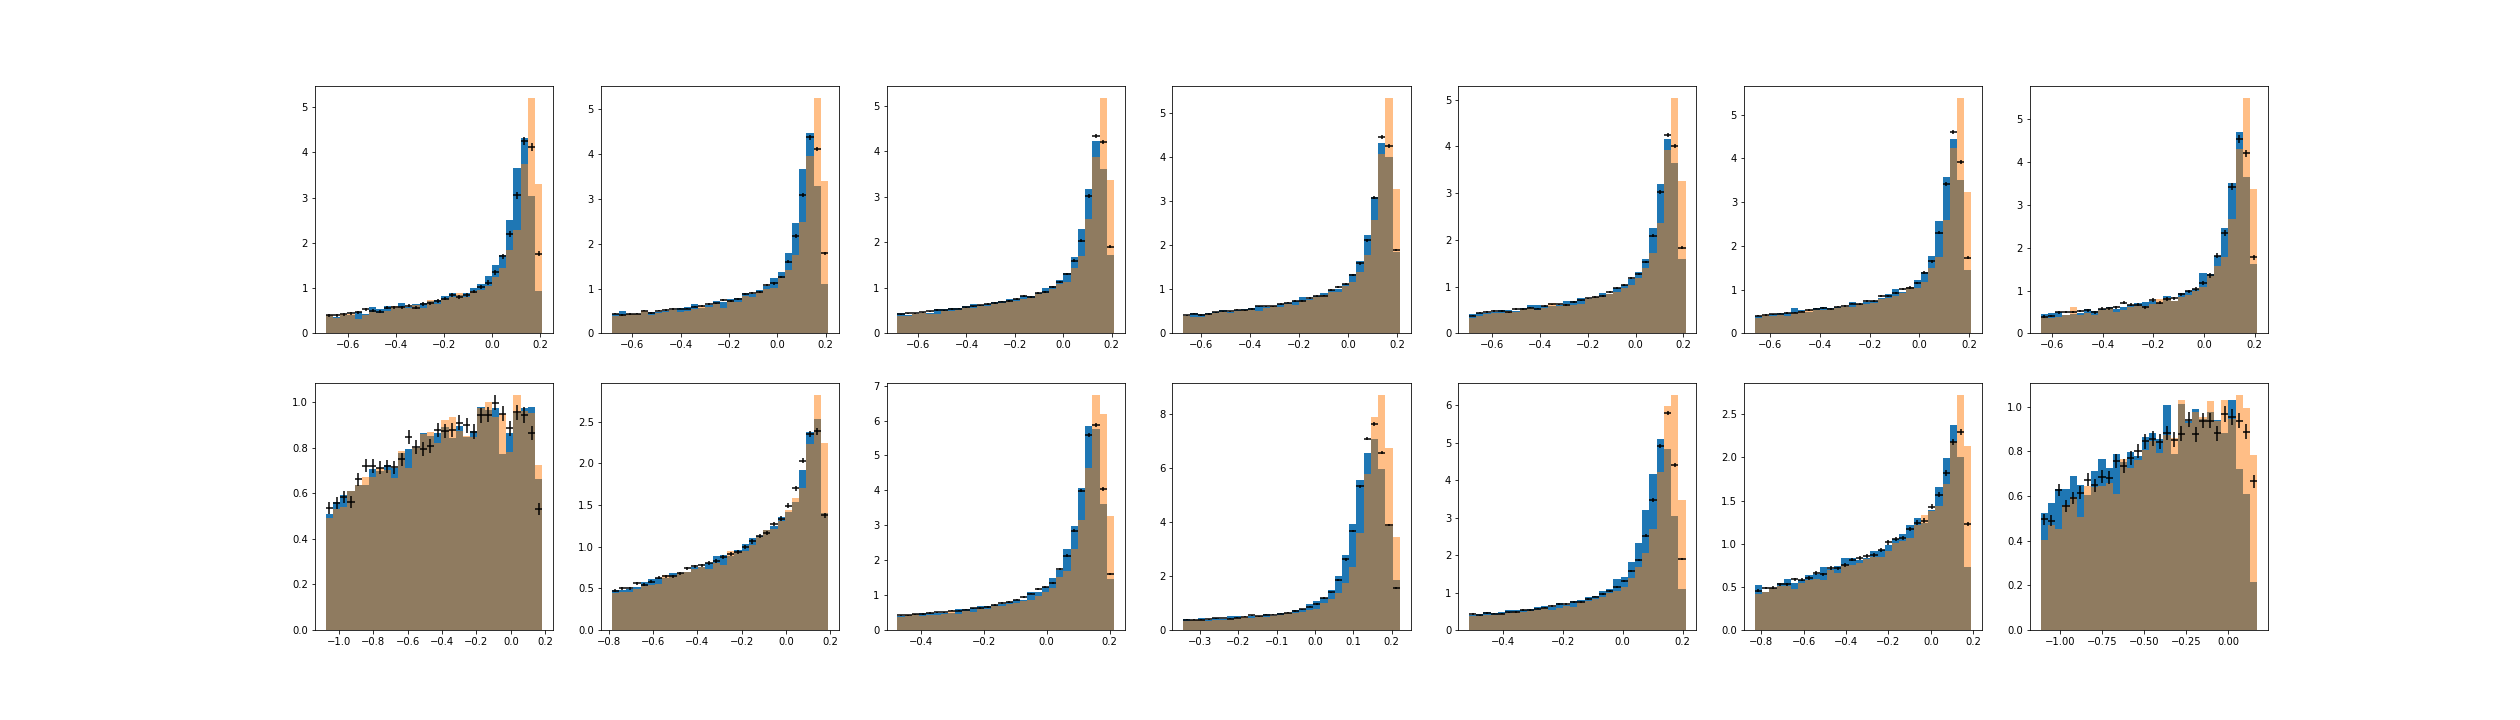

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_700_var0.png


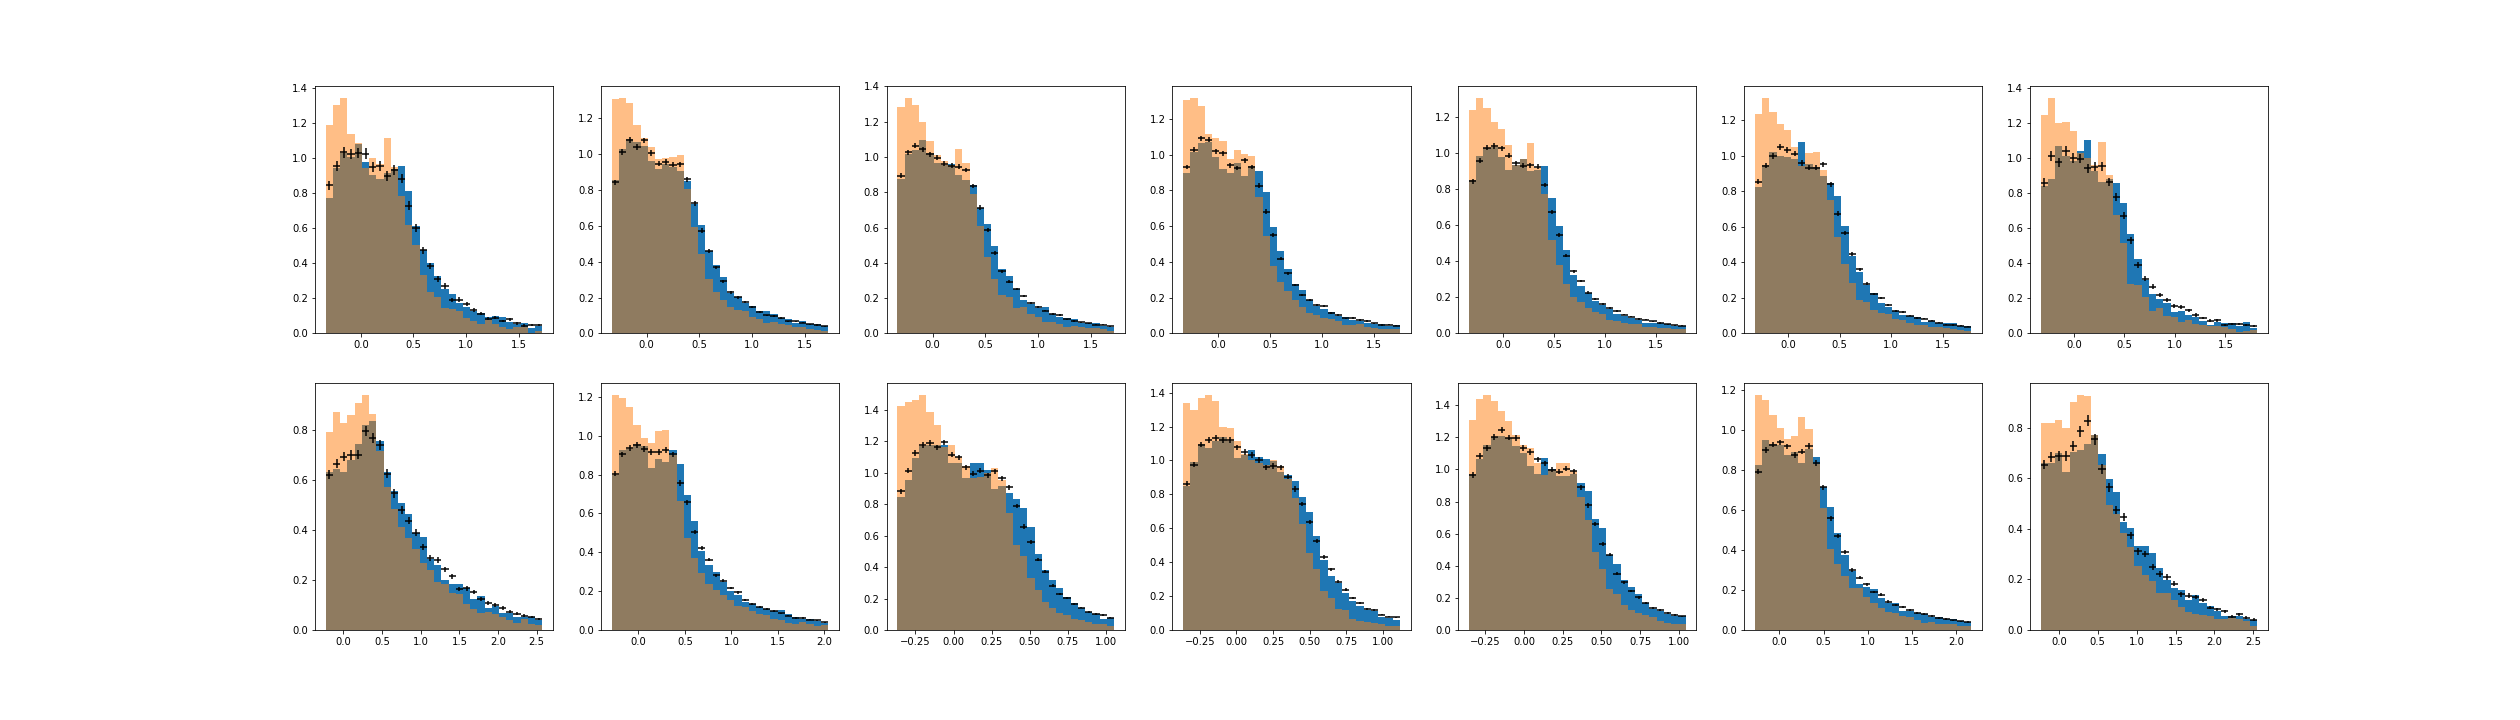

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_600_var1.png


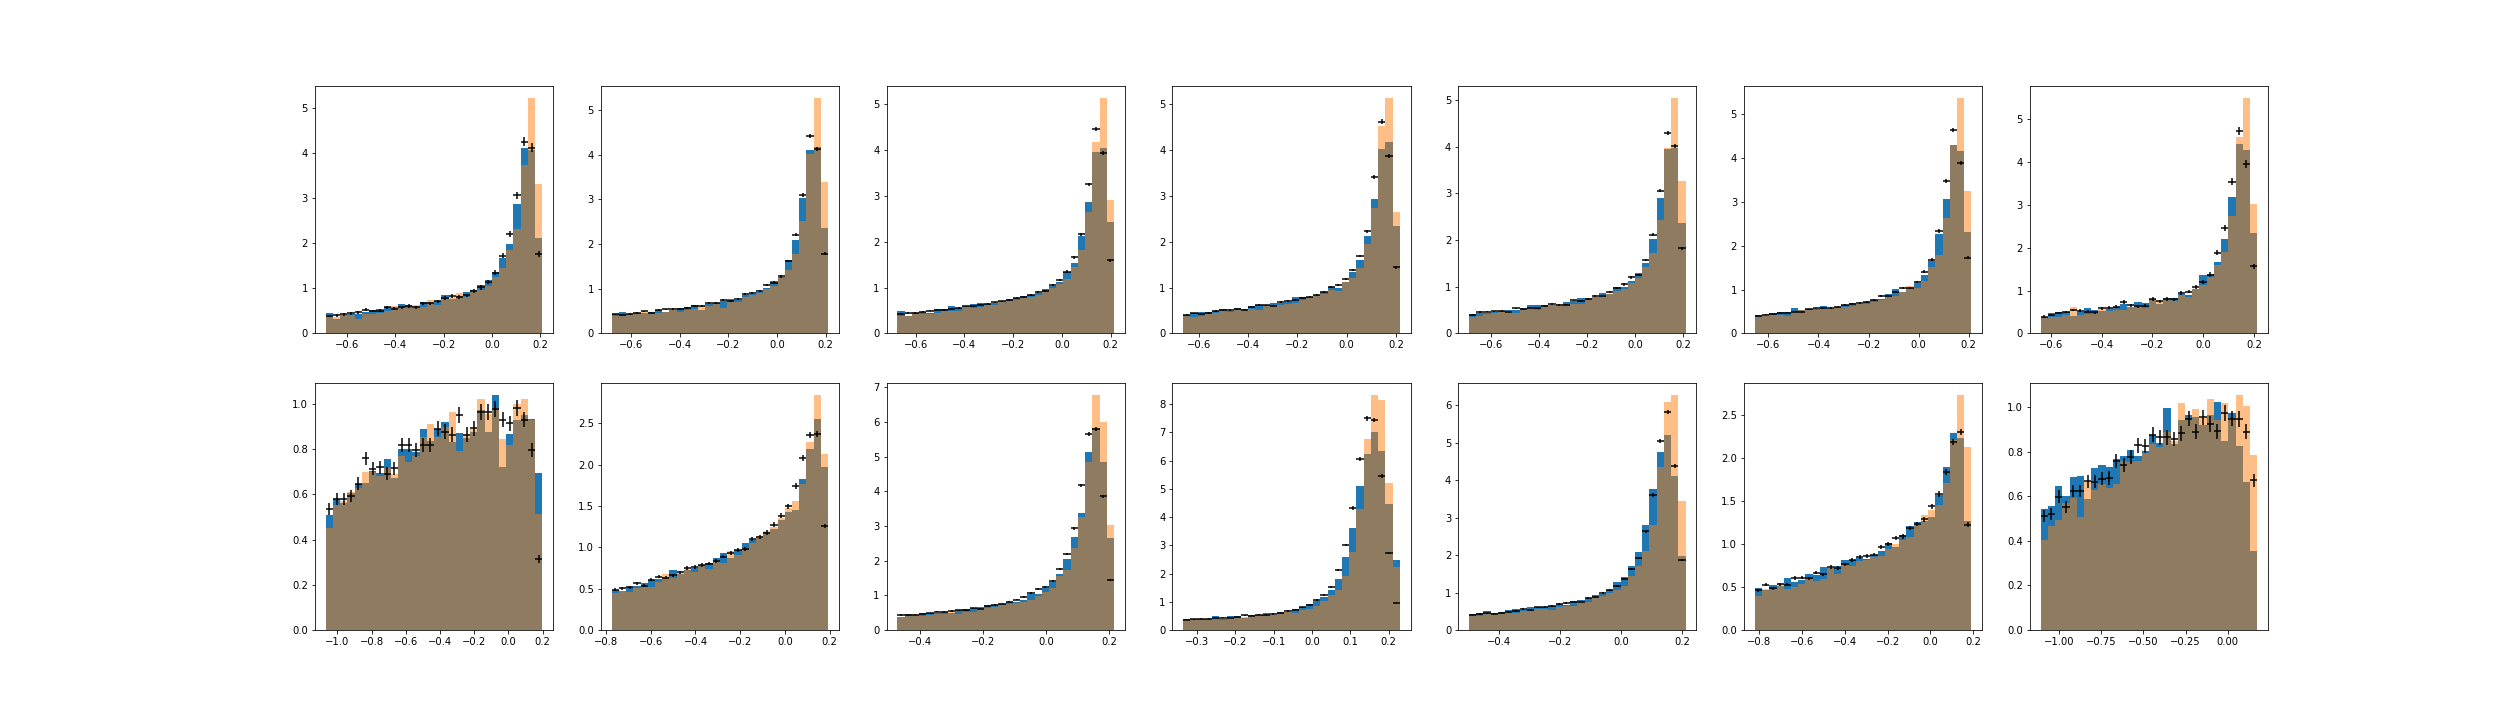

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_600_var0.png


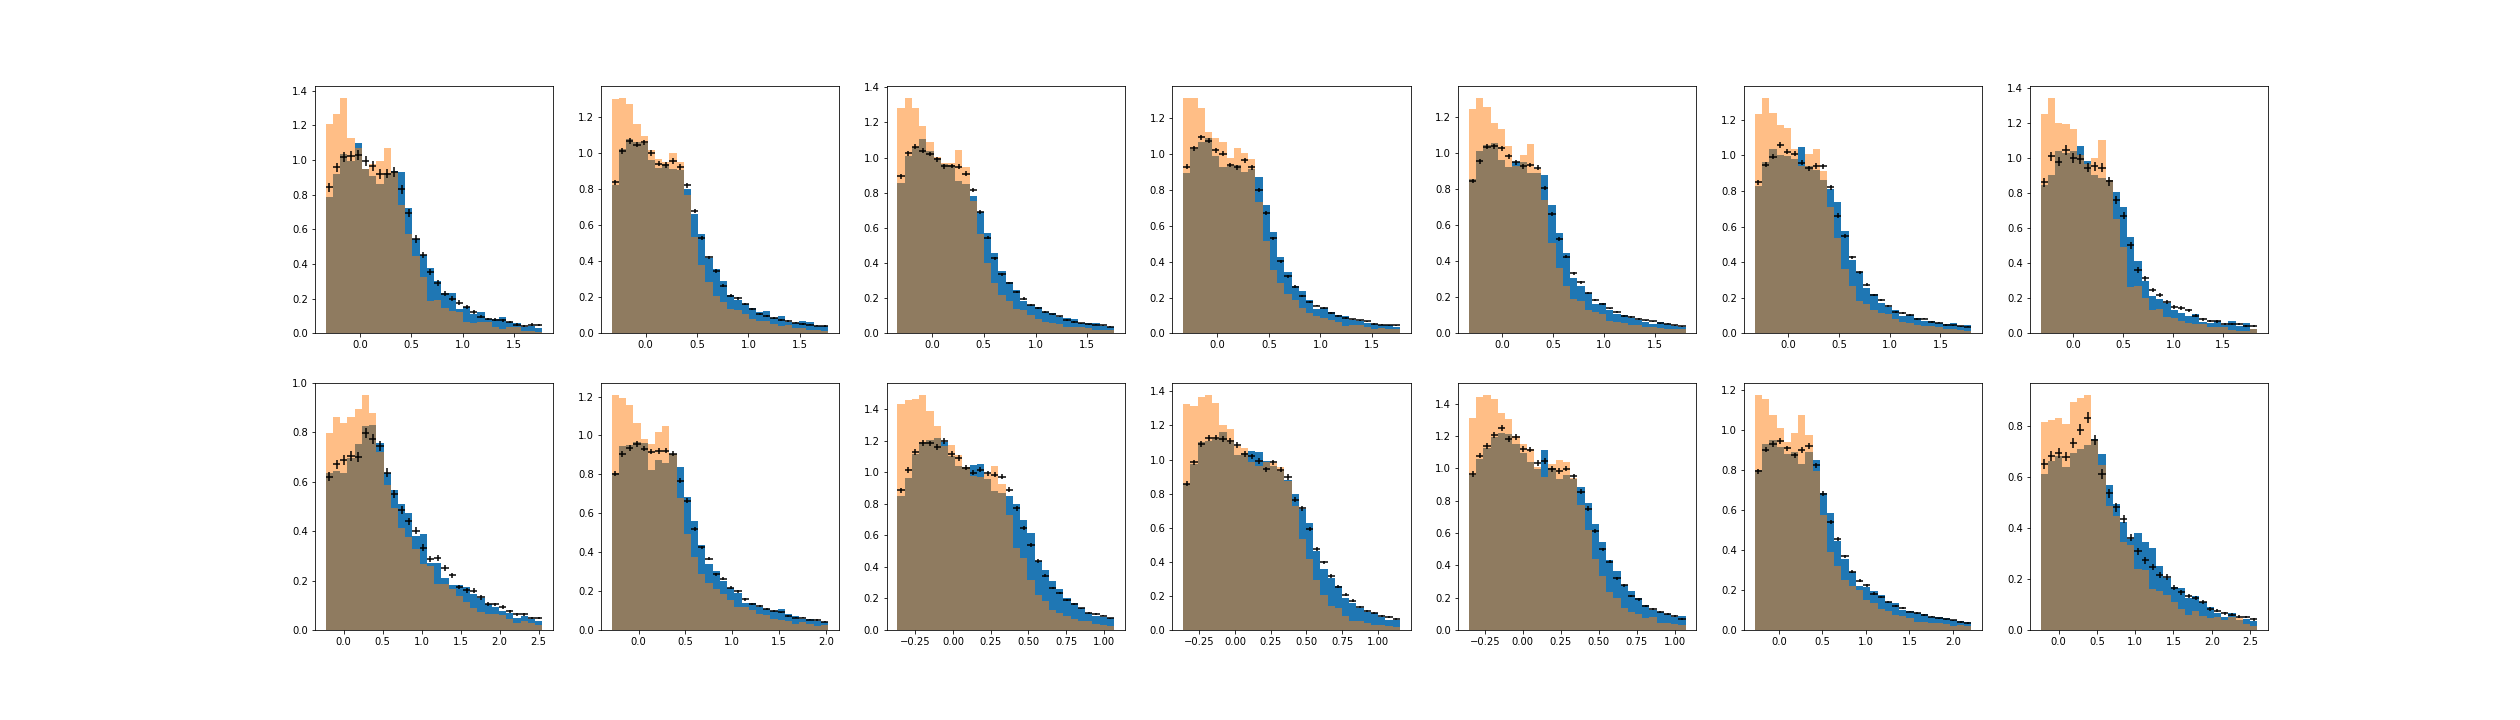

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_500_var1.png


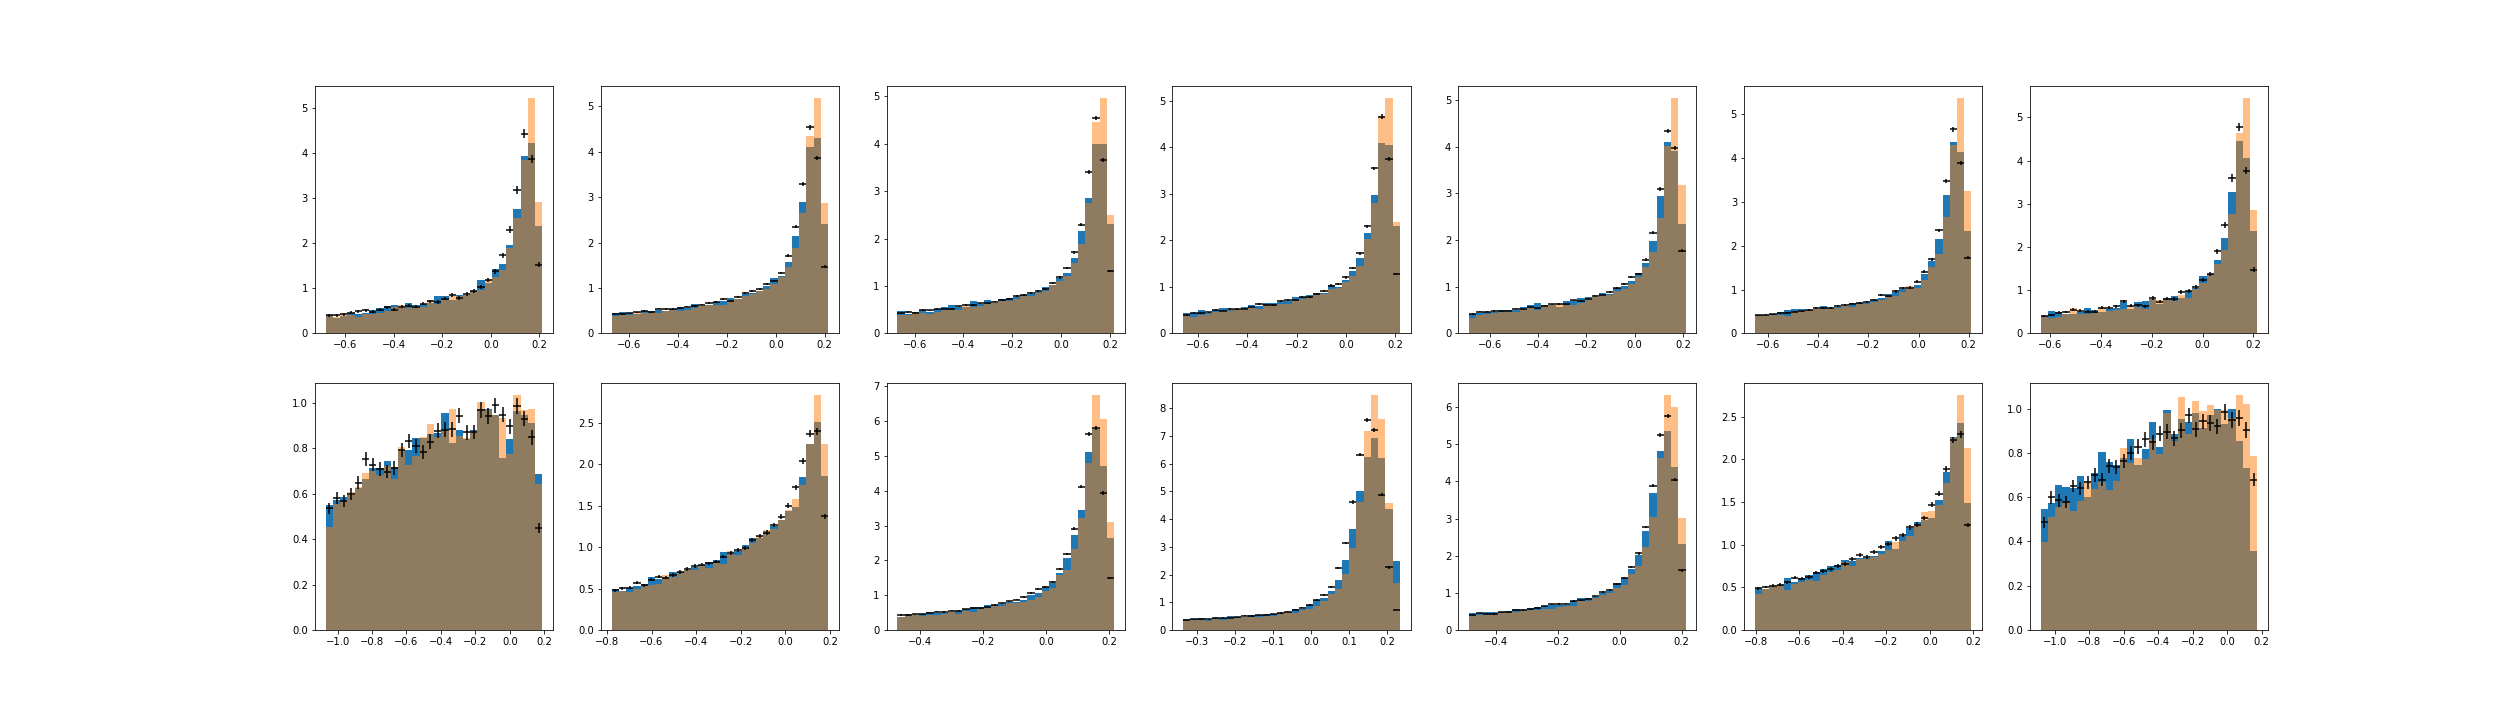

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_500_var0.png


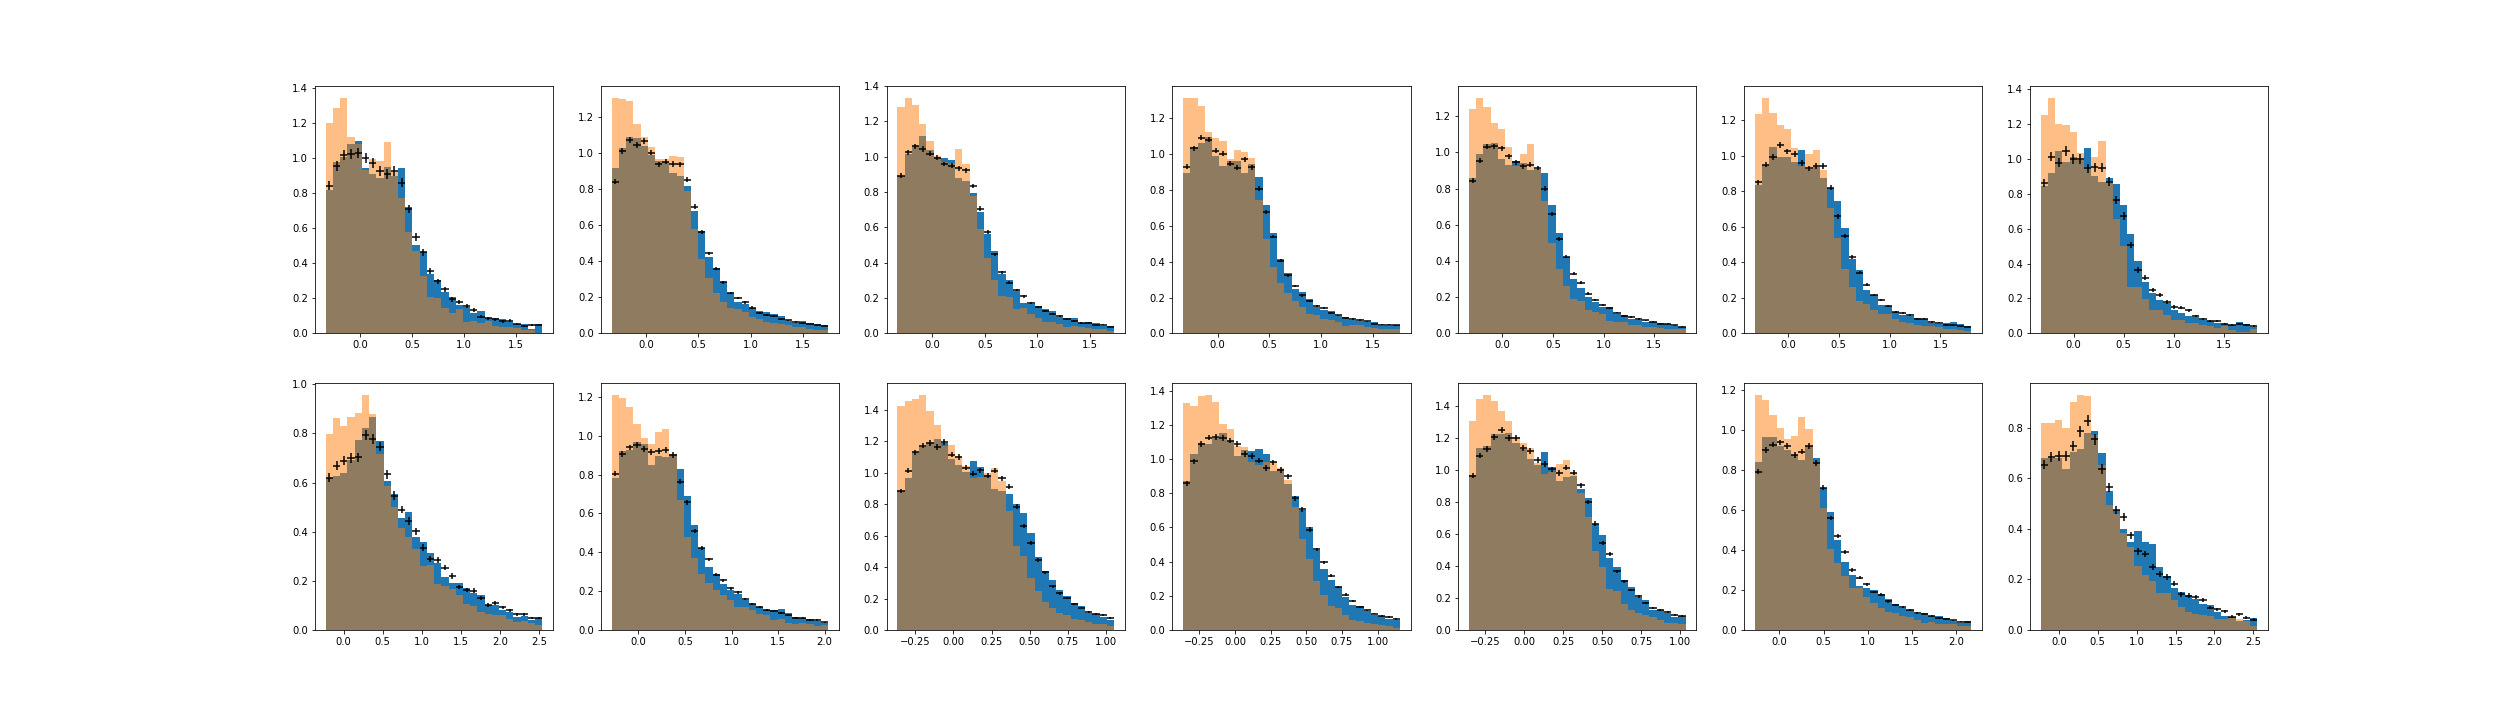

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_400_var1.png


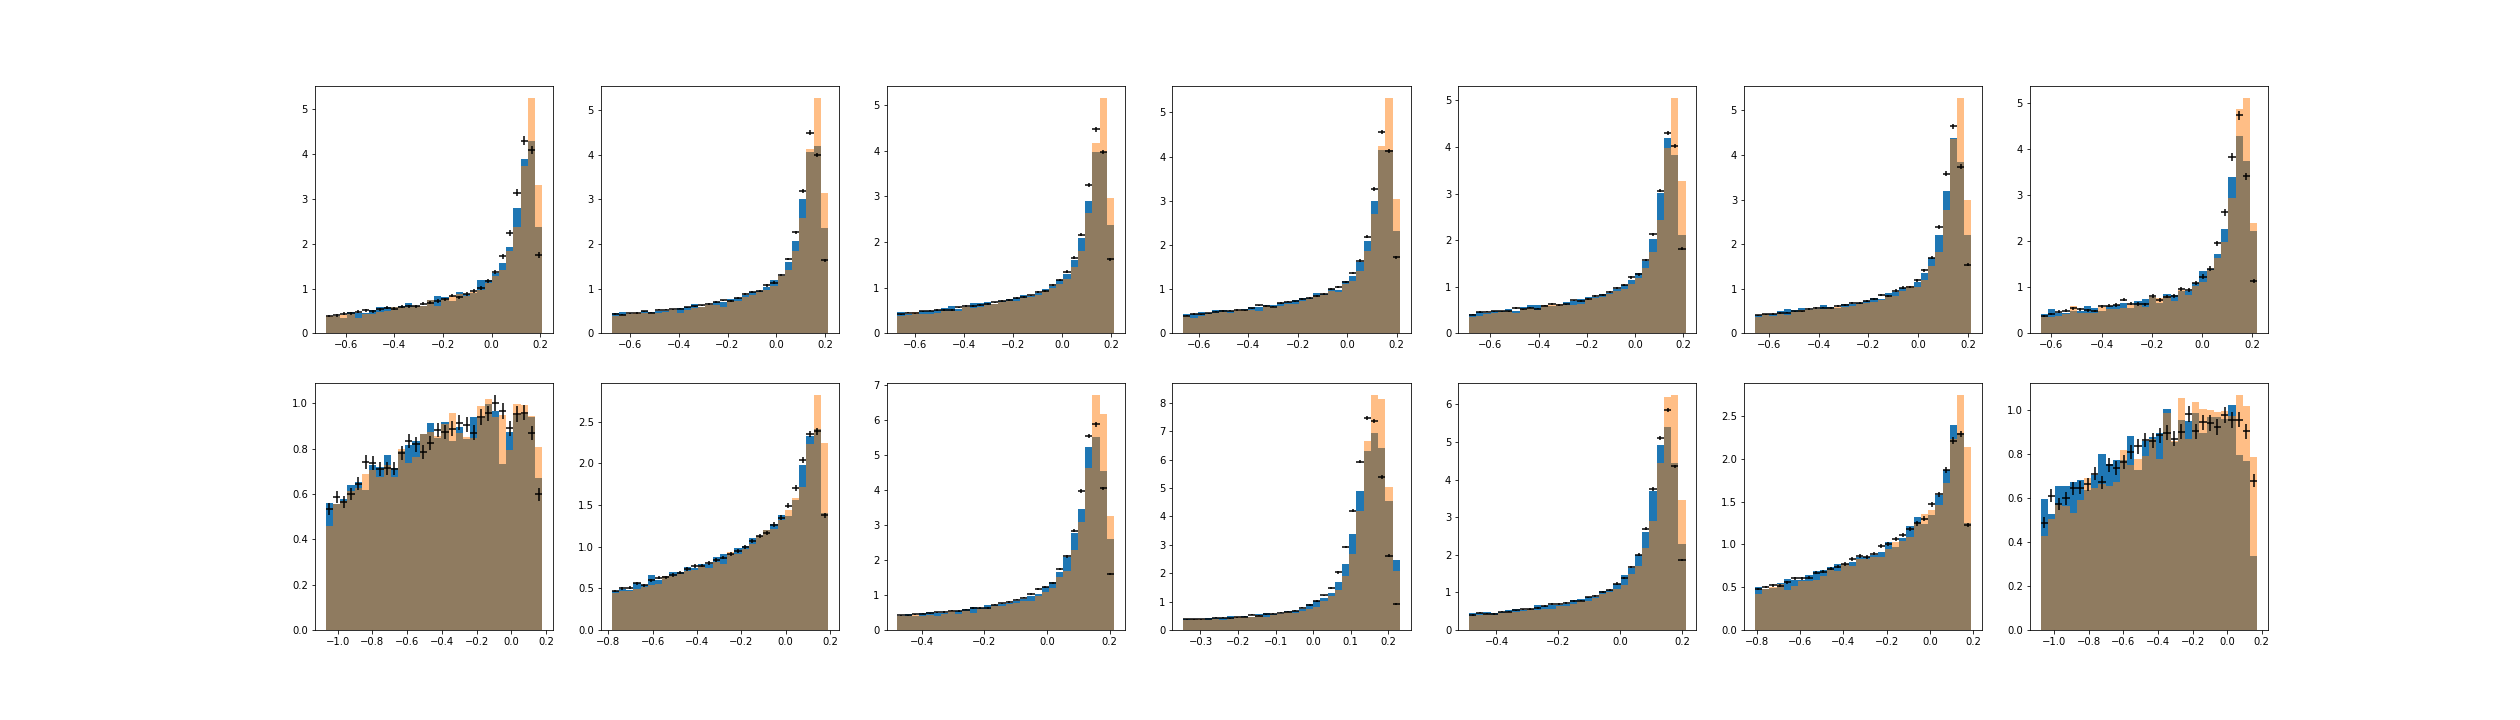

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_400_var0.png


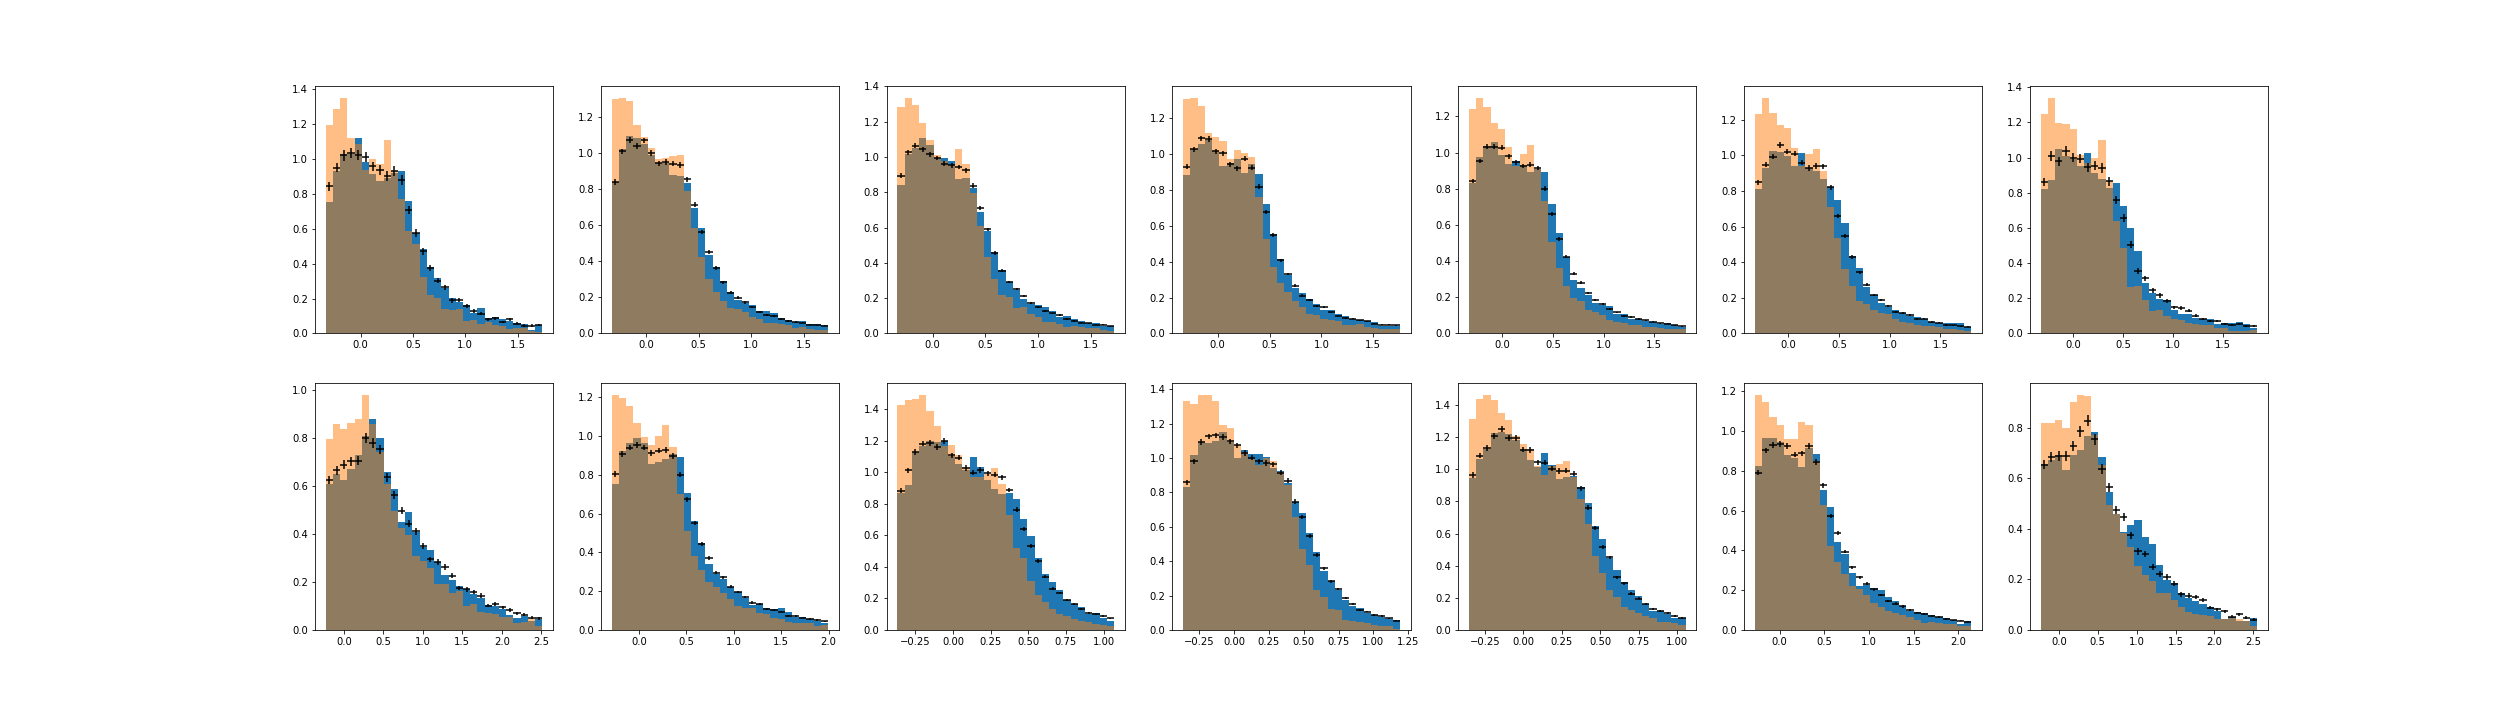

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_300_var1.png


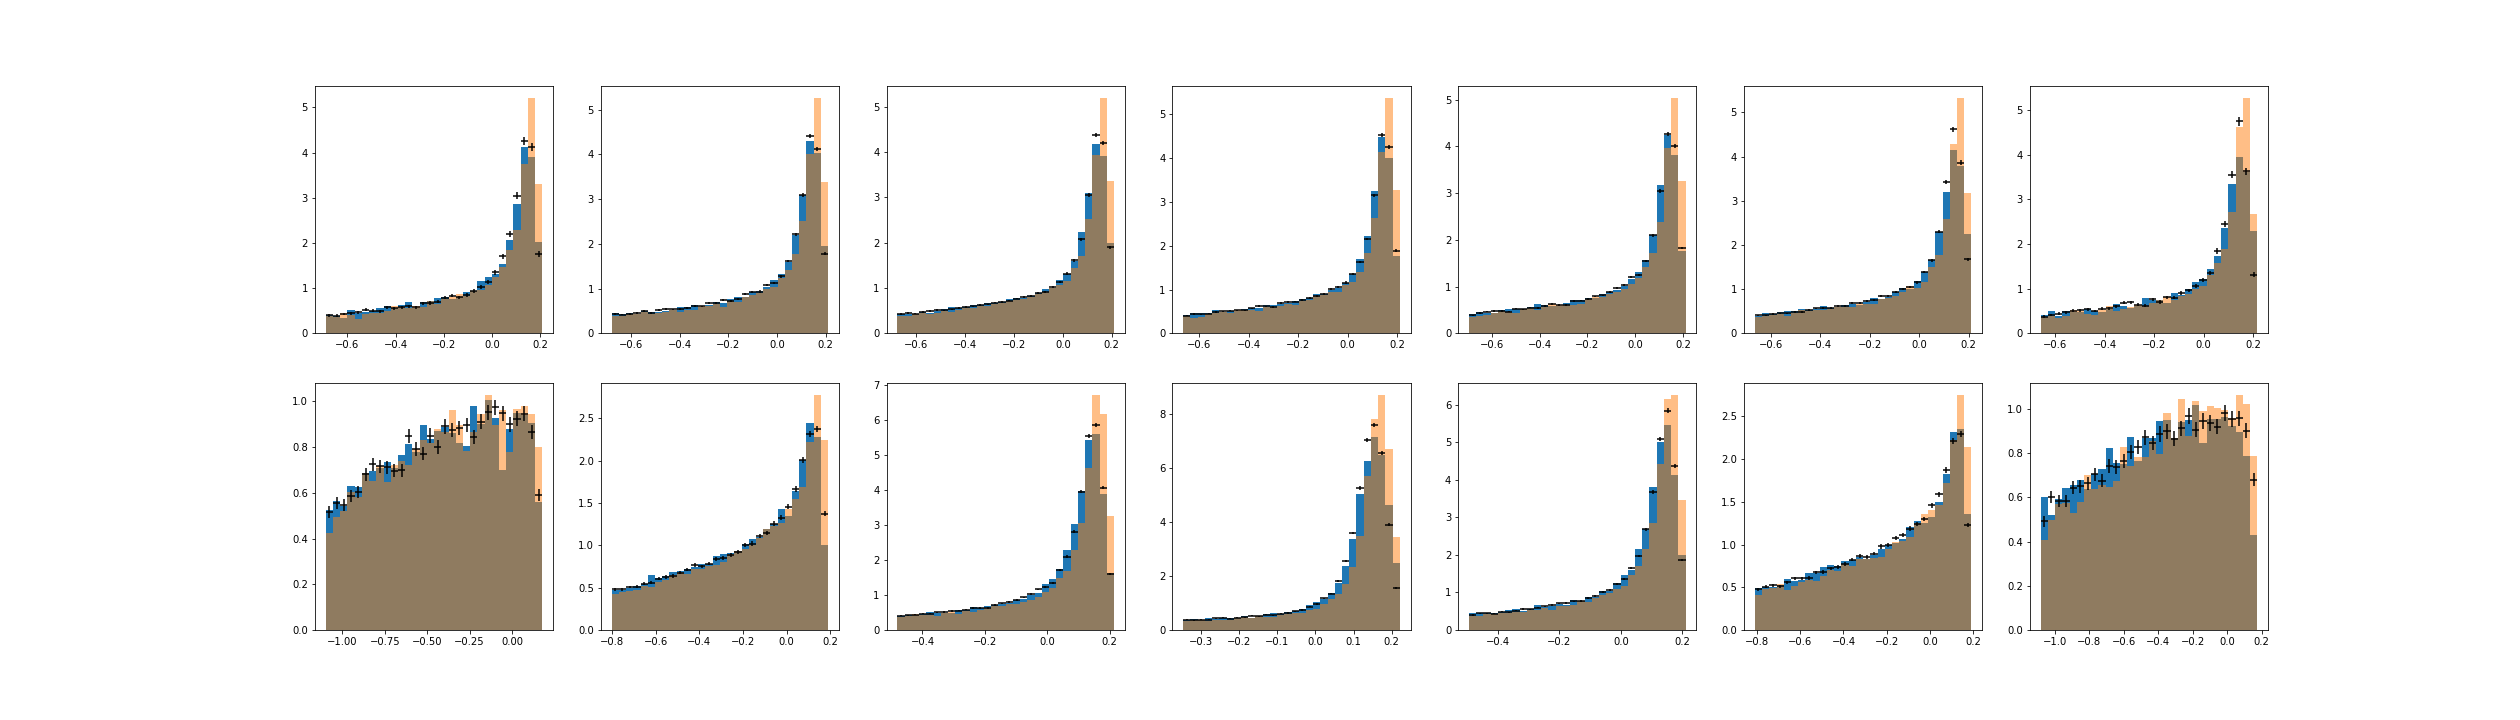

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_300_var0.png


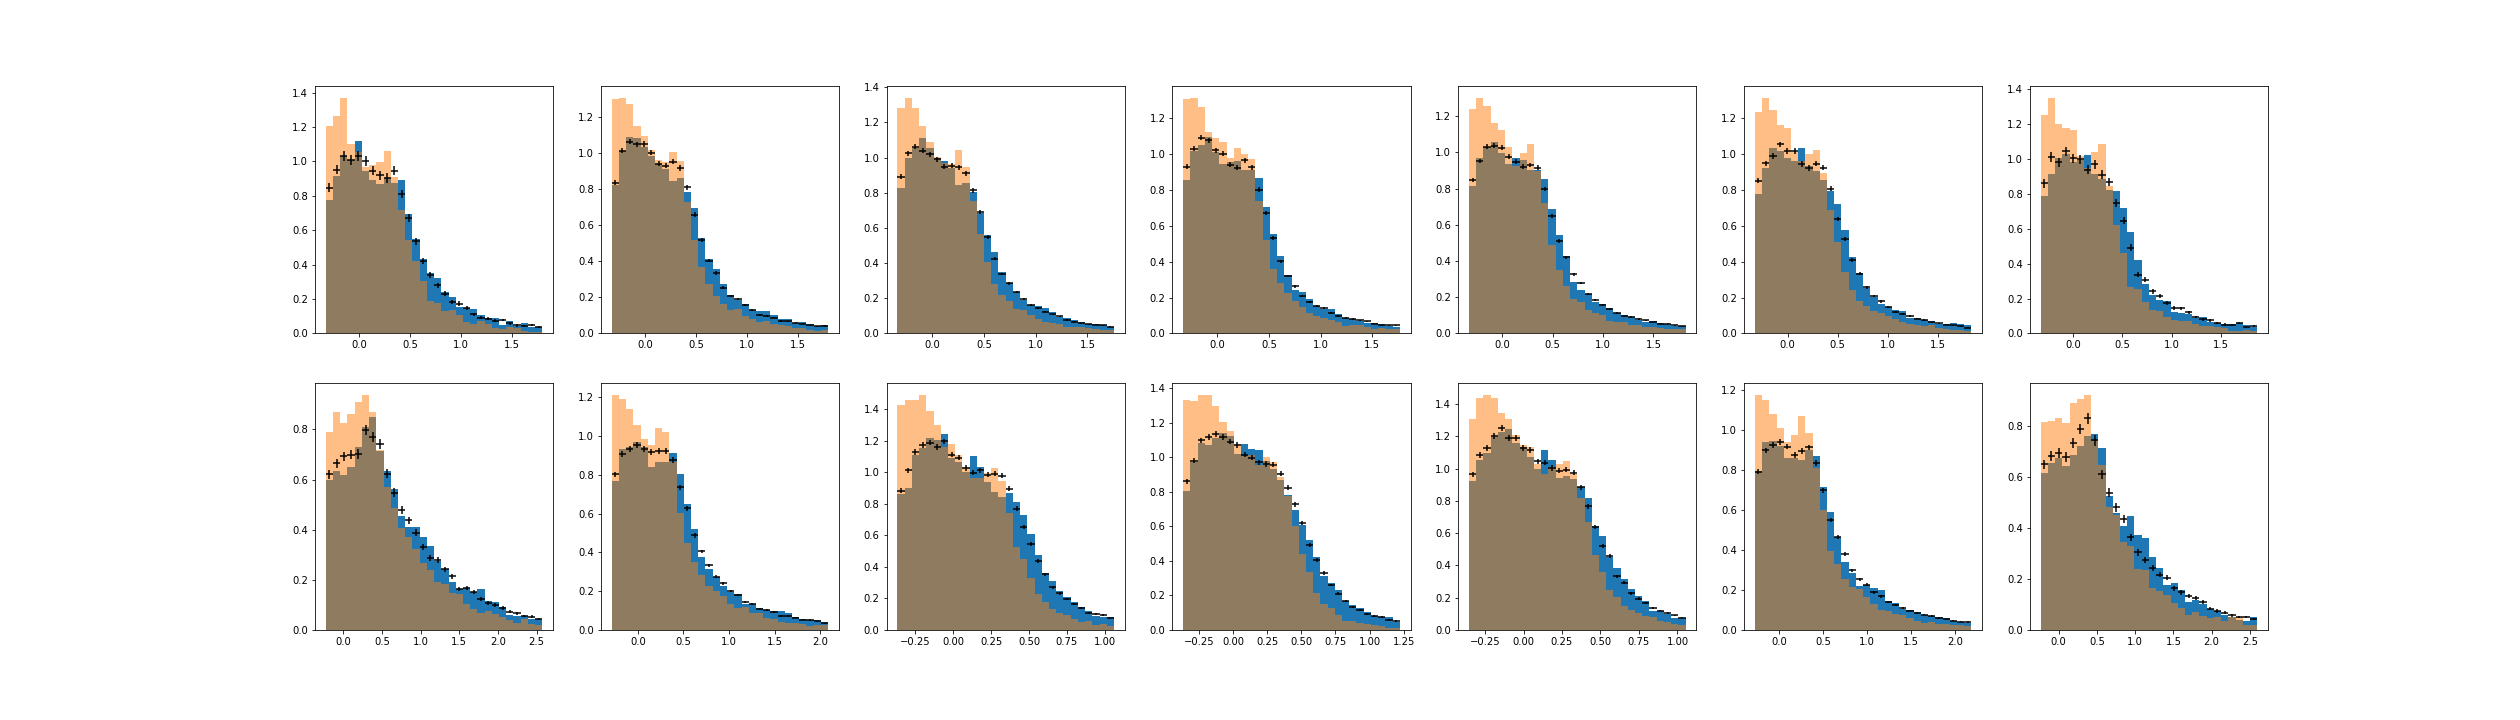

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_200_var1.png


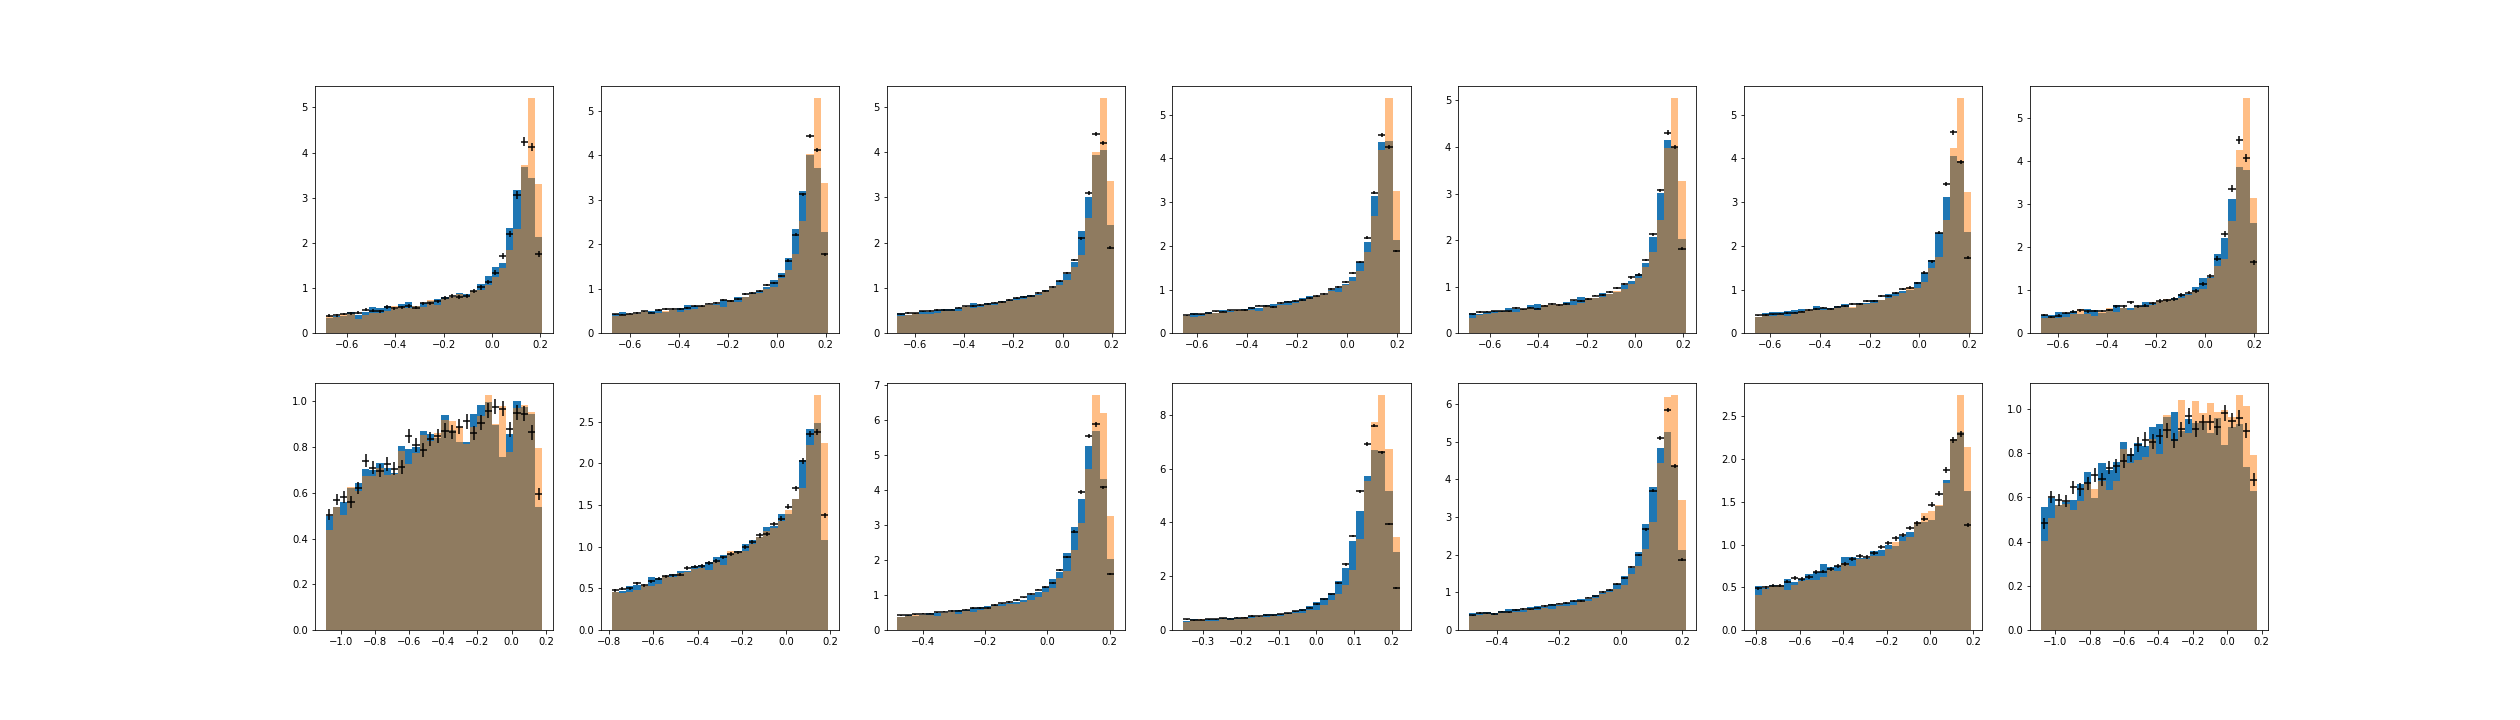

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_200_var0.png


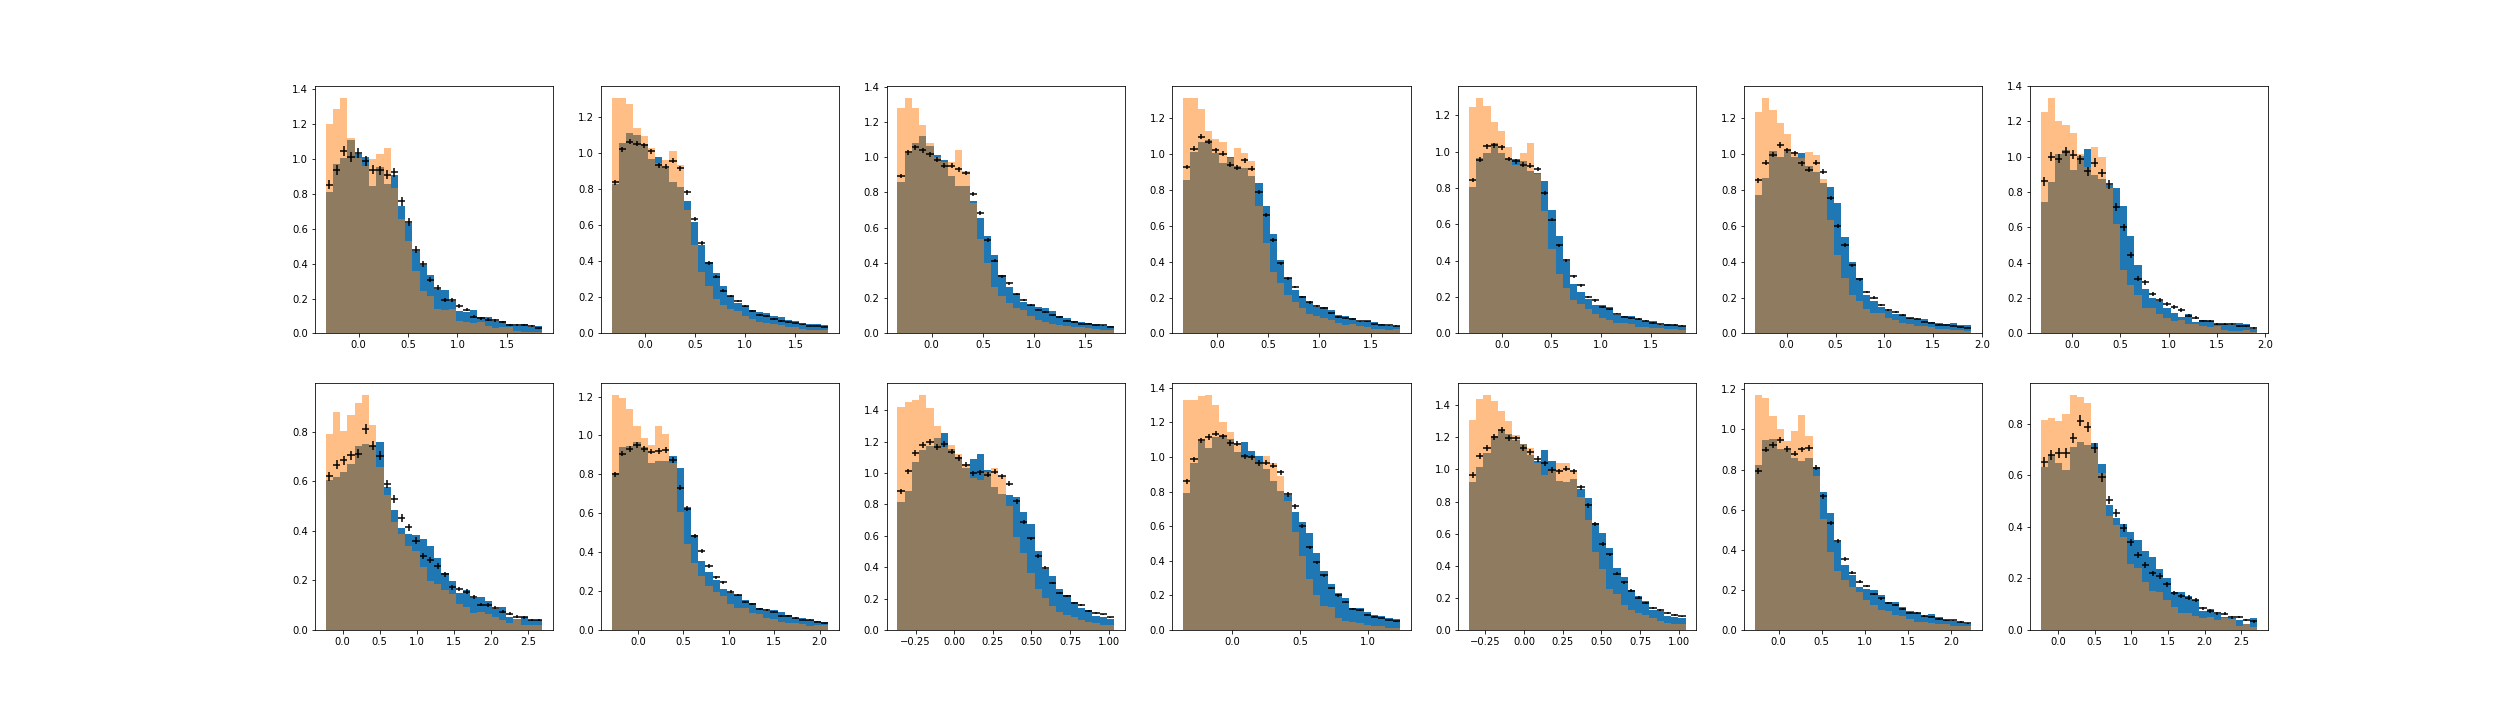

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_100_var1.png


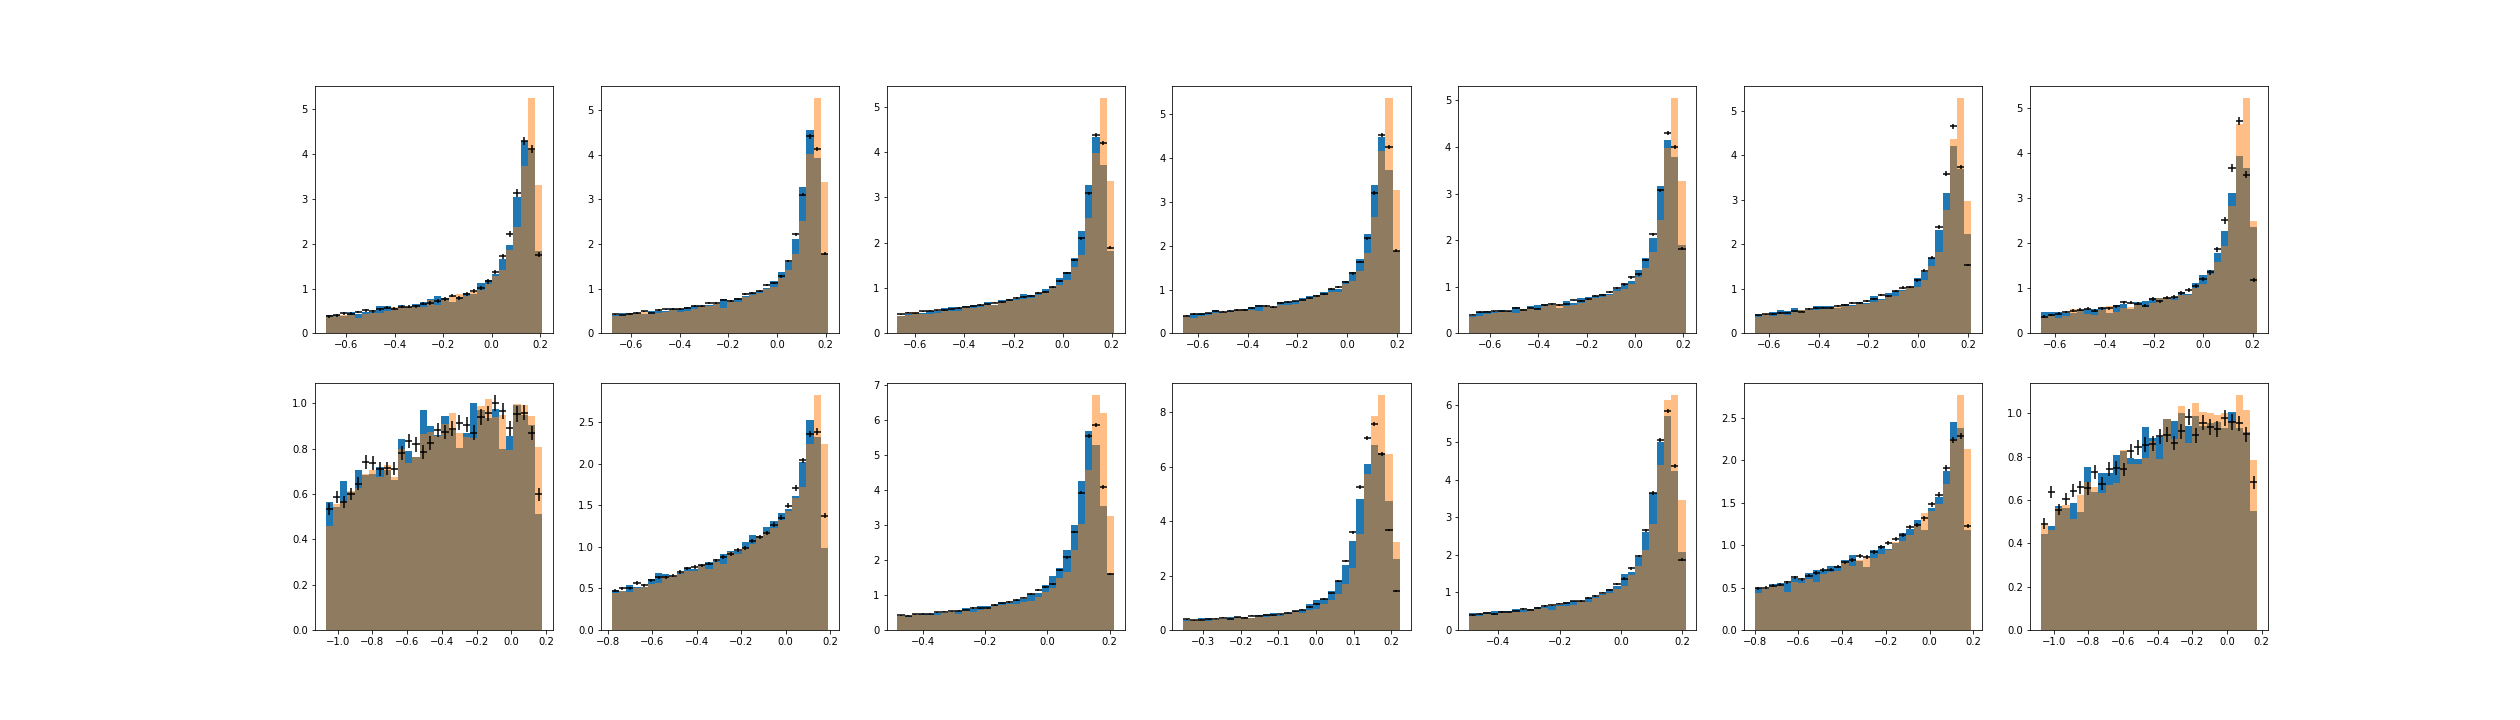

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_100_var0.png


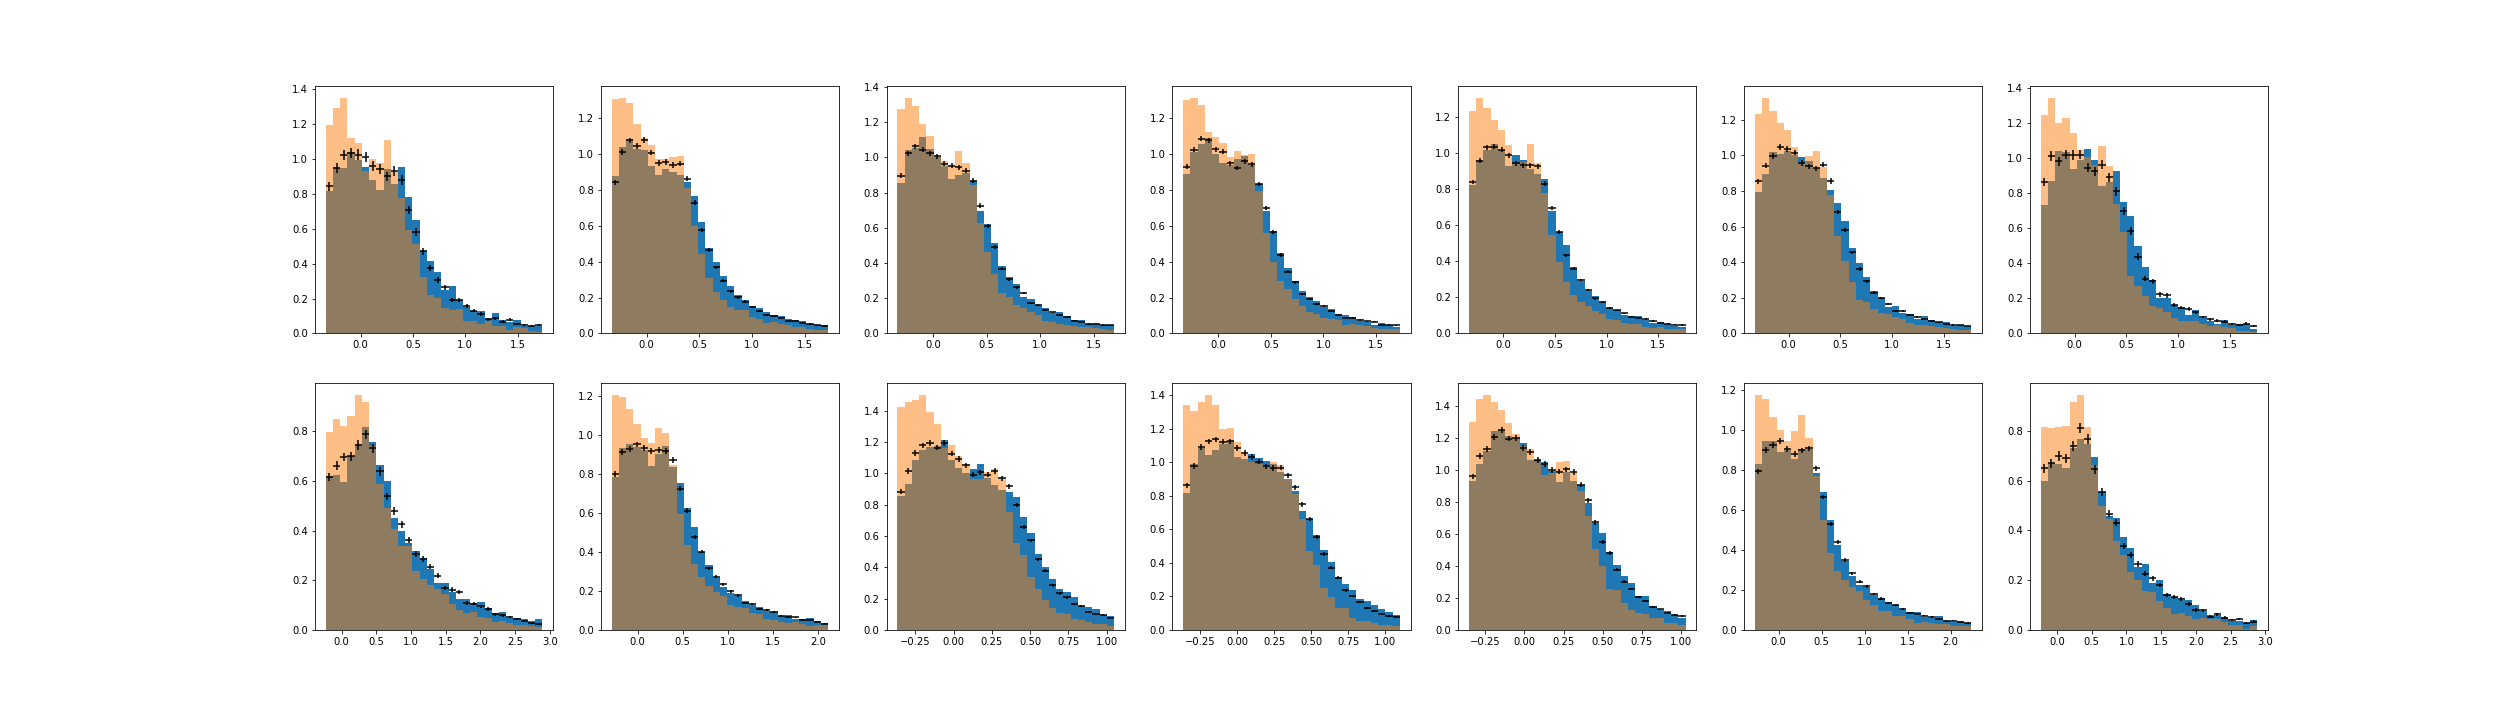

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_0_var1.png


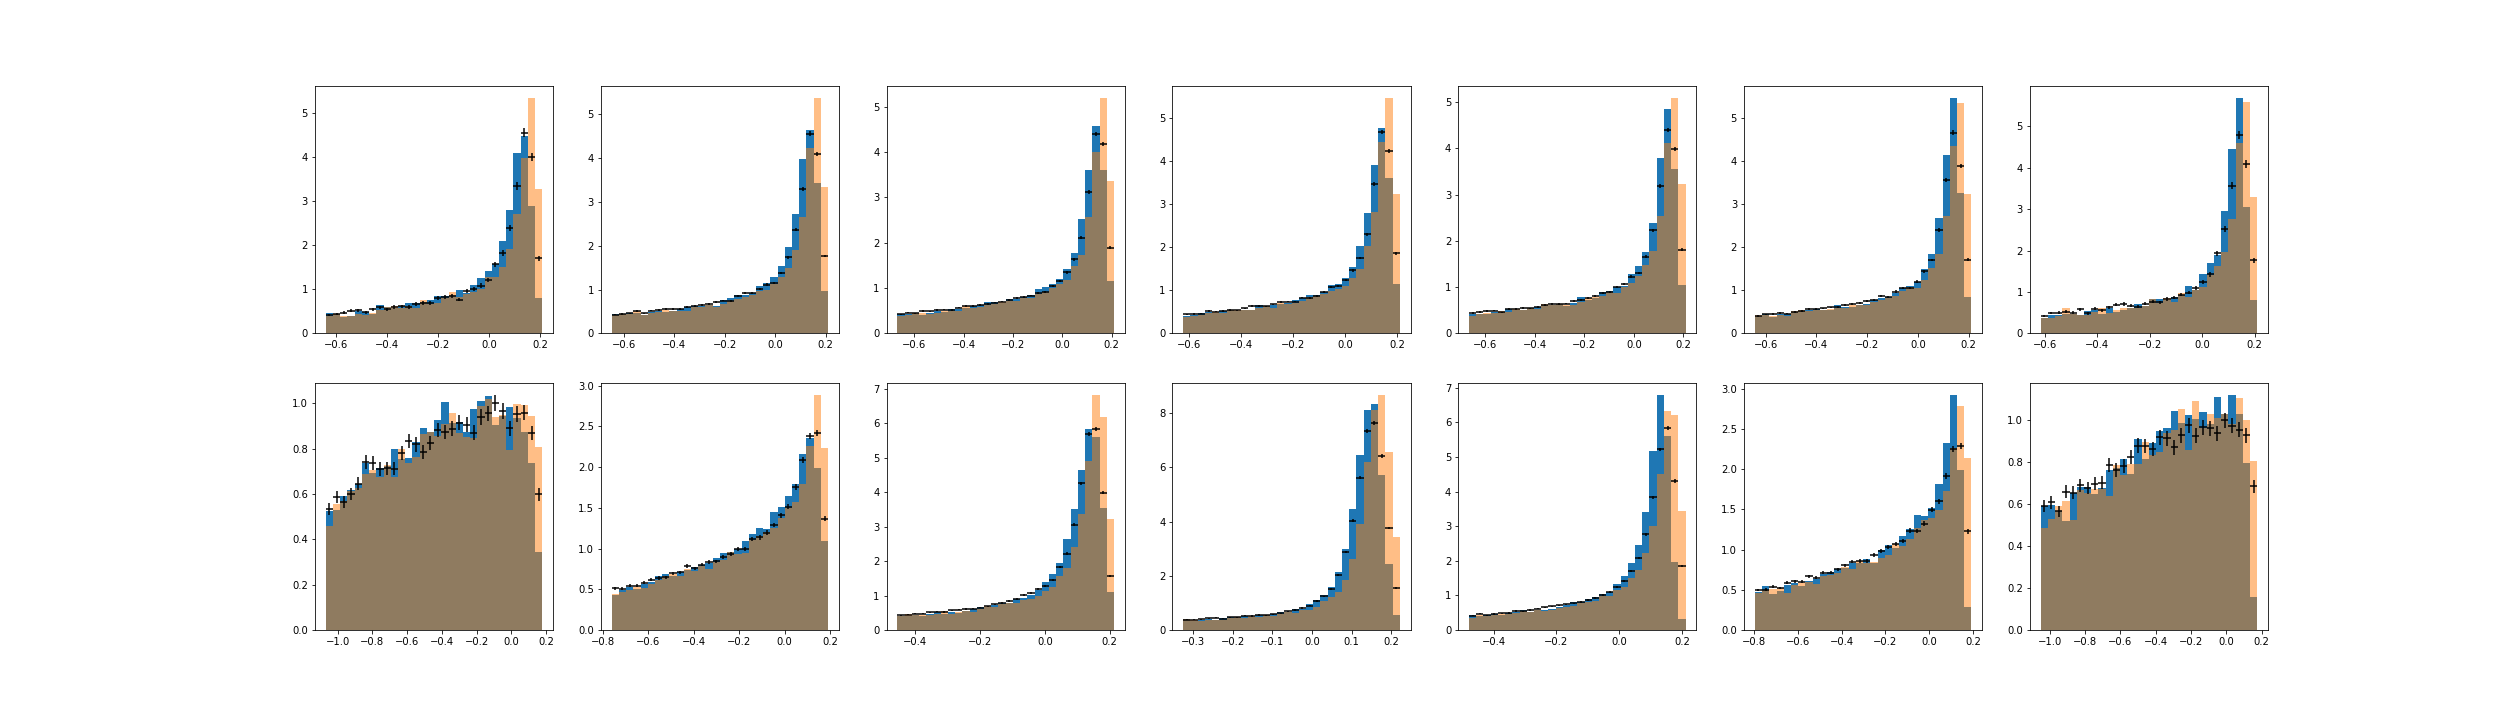

logs_reweight_2Dx2D_clip2_1000_lr2_tanh/sampleepoch_0_var0.png


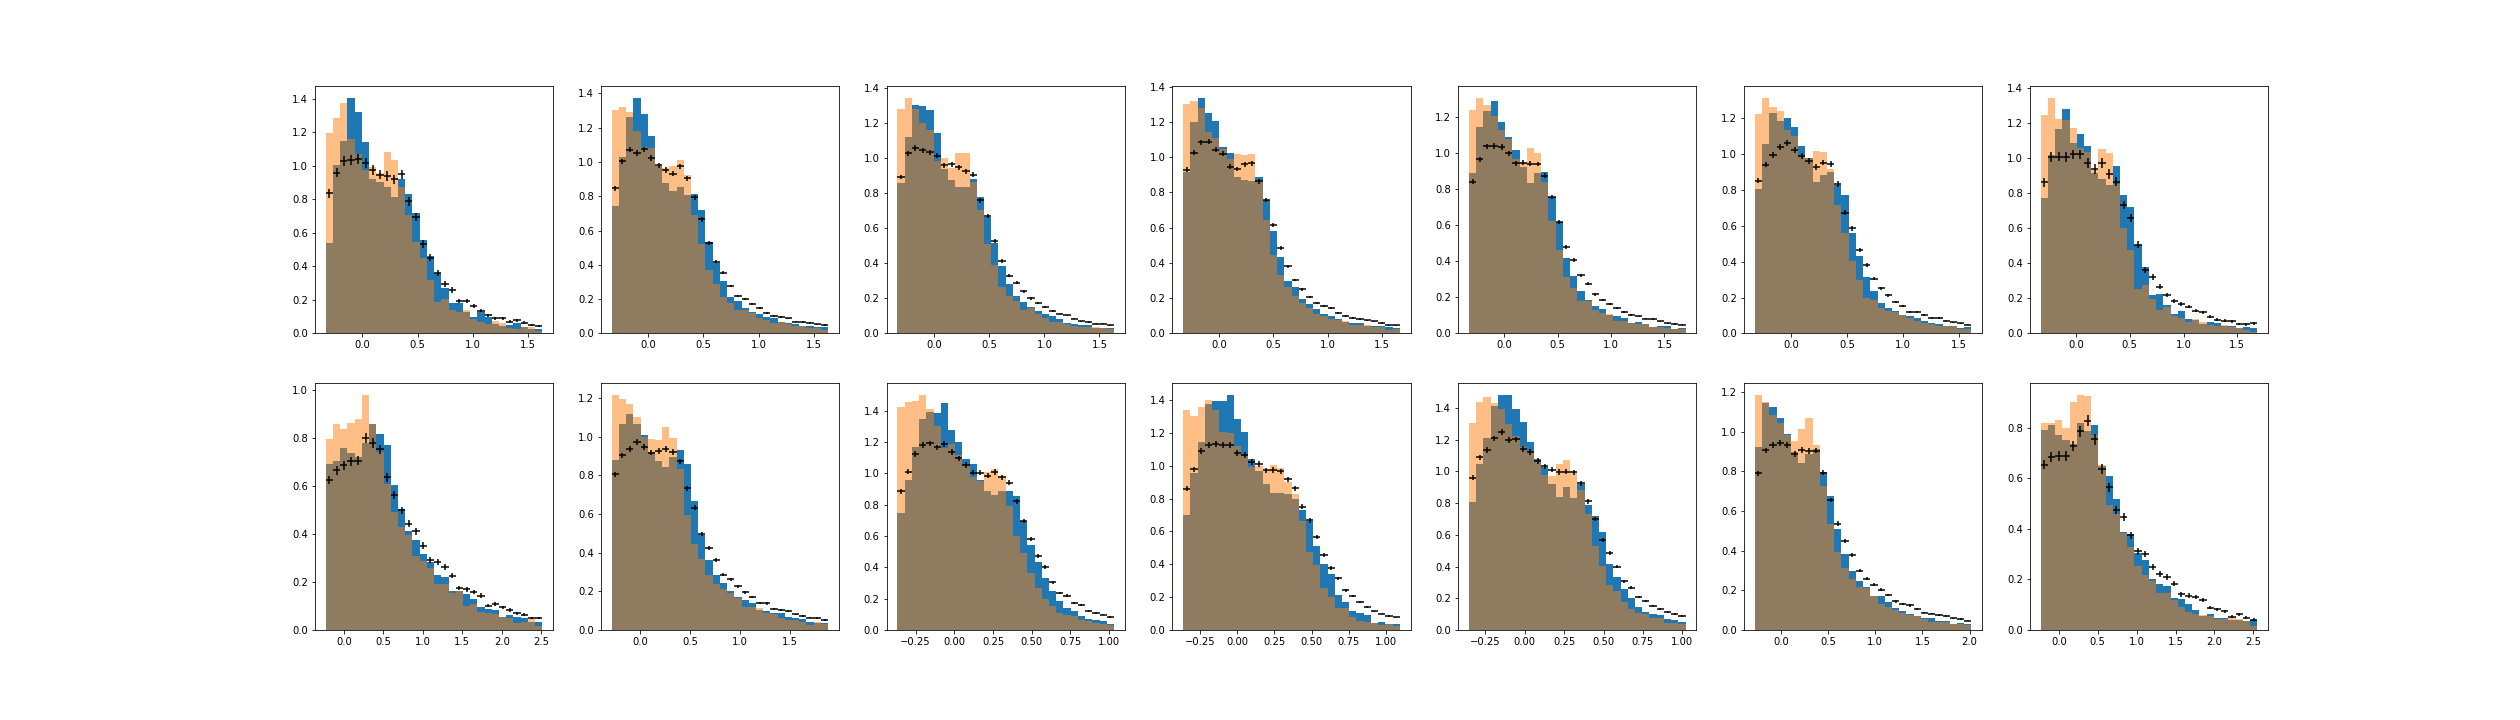

In [34]:
images = ! ls $target/*.png

for img in reversed(images):
    print(img)
    display(Image(img))

In [1184]:
import GAN.ffwd as ffwd

reload(ffwd)


<module 'GAN.ffwd' from '/users/musella/jupyter/GAN/GAN/ffwd.py'>

In [1185]:
# discriminator = ffwd.FFDBuilder(**{'activation': None,
#   'clip_weights': 0.01,
#   'kernel_sizes': [256, 256, 256, 256, 256],
#   'name': 'D_256x5'})((1,1),(1,1))

In [1186]:
from keras.models import load_model
import GAN.models

from glob import glob 

discriminators = glob('%s/discriminator1-epoch*.hdf5' % target)

# discriminator = load_model('%s/discriminator-epoch400.hdf5' % target)

In [1187]:
def weight_lims(disc):
    maxes = []
    mins = []
    means = []
    for layer in discriminator.layers:
        print(layer)
        for weights in layer.get_weights():
            means.append(np.mean(weights))
            maxes.append(np.max(weights))
            mins.append(np.min(weights))
    return np.array( [means,mins,maxes] )

lims = []
for fname in discriminators:
    discriminator = load_model(fname)
    lims.append(weight_lims(discriminator))

WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02


/users/musella/my-env/lib/python3.5/site-packages/keras/models.py:248: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02


In [1188]:
# maxes = []
# mins = []
# for layer in discriminator.layers:
#     print(layer)
#     for weights in layer.get_weights():
#         maxes.append(np.max(weights))
#         mins.append(np.min(weights))

In [1189]:
lims = np.array(lims)

In [1190]:
print(lims.shape)

(5, 3, 12)


In [1191]:
absmax = lims[:,2,:].max(axis=1)
absmin = lims[:,1,:].min(axis=1)


In [1192]:
absmin,absmax

(array([-0.02, -0.02, -0.02, -0.02, -0.02], dtype=float32),
 array([ 0.02,  0.02,  0.02,  0.02,  0.02], dtype=float32))

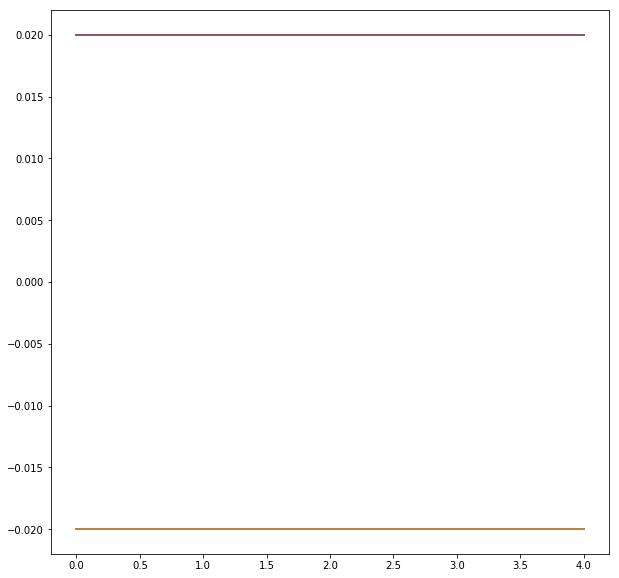

In [1193]:
plt.plot(lims[:,2,[0,2,4,6,8,10]])
plt.plot(lims[:,1,[0,2,4,6,8,10]])


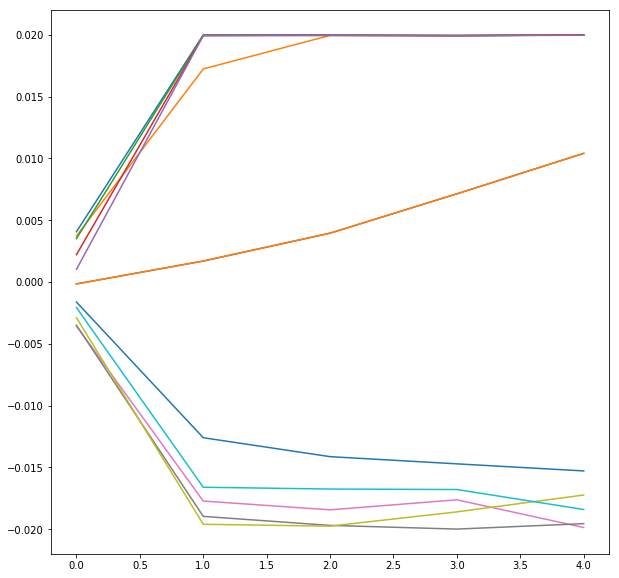

In [1194]:
plt.plot(lims[:,2,[1,3,5,7,9,11]])
plt.plot(lims[:,1,[1,3,5,7,9,11]])


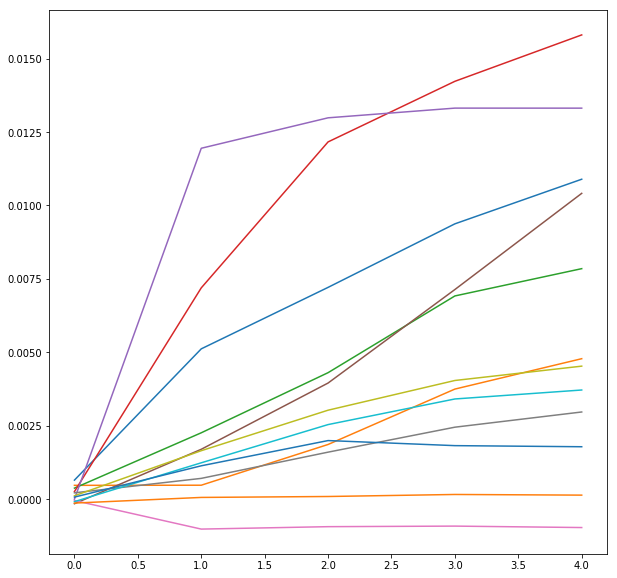

In [1195]:
plt.plot(lims[:,0,[1,3,5,7,9,11]])
plt.plot(lims[:,0,[0,2,4,6,8,10]])


In [1196]:
generators = glob('%s/generator-epoch*.hdf5' % target)

generators

['logs_reweight_2Dx2D_clip2_1000_lr2_tanh_G_128x7/generator-epoch0.hdf5',
 'logs_reweight_2Dx2D_clip2_1000_lr2_tanh_G_128x7/generator-epoch50.hdf5',
 'logs_reweight_2Dx2D_clip2_1000_lr2_tanh_G_128x7/generator-epoch100.hdf5',
 'logs_reweight_2Dx2D_clip2_1000_lr2_tanh_G_128x7/generator-epoch150.hdf5',
 'logs_reweight_2Dx2D_clip2_1000_lr2_tanh_G_128x7/generator-epoch200.hdf5',
 'logs_reweight_2Dx2D_clip2_1000_lr2_tanh_G_128x7/generator-epoch250.hdf5']

In [1199]:
generator = load_model(generators[-1])



/users/musella/my-env/lib/python3.5/site-packages/keras/models.py:248: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


16

In [957]:
from keras.layers import PReLU, Dense

prelus = []

for layer in generator.layers:
    if type(layer) == PReLU:
        prelus.append(layer)

In [958]:
for layer in prelus:
    print(layer)
    for weights in layer.get_weights():
        print(weights.shape)
        plt.hist(weights.ravel())
        plt.show()